# Modelling Wind Speed and Direction Distribution using Gaussain Mixture Modles (OEN method)

OEN Method: Harris, Cook
The parent wind speed distribution: Why Weibull?
http://www.sciencedirect.com/science/article/pii/S0167610514001056

Gaussian Mixture Modles, 
http://scikit-learn.org/stable/modules/mixture.html

# 1. Set up

## 1.1 Environment

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from __future__ import division
from import_file import *
load_libs()

In [2]:
## Input params used outside this notebook
# params = {'gaussian_number': 4, 'file_path': "./data/NCDC/uk/weybourne/dat.txt"}
dictget = lambda d, *k: [d[i] for i in k]
if 'params' in globals():
    input_file_path, NUMBER_OF_GAUSSIAN, FIT_METHOD, KDE_GRIDSEARCH = dictget(params, 'input_file_path', 
                                                                              'gaussian_number', 
                                                                              'fit_method', 'kde_gridsearch')

## 1.2 Read Data

In [3]:
# ipath= './data/NCDC/uk/boscombe_down/dat.txt' # try 4
# ipath= './data/NCDC/uk/middle_wallop/dat.txt' # good
# ipath= './data/NCDC/uk/southhamption/dat.txt'
# ipath= './data/NCDC/uk/bournemouth/dat.txt'
ipath= './data/NCDC/tiree.txt' # try 4
# ipath= "./data/NCDC/uk/benbecula/dat.txt" # initial speed 
# ipath= "./data/NCDC/uk/bealach_na_ba/dat.txt" # problematic data, tail with no end
# ipath= "./data/NCDC/uk/skye_lusa/dat.txt" # generally good, one direction big deviation
# ipath= "./data/NCDC/uk/south_uist_range/dat.txt" 
# ipath= "./data/NCDC/marham.txt"
# ipath= "./data/NCDC/uk/holbeach/dat.txt"
# ipath= "./data/NCDC/uk/weybourne/dat.txt"
# ipath= "./data/NCDC/uk/cambridge/dat.txt"
# ipath= "./data/NCDC/uk/wattisham/dat.txt"
# ipath= "./data/NCDC/uk/lakenheath/dat.txt" # irregular sampling time
# ipath= "./data/NCDC/uk/mildenhall/dat.txt" # irregular sampling time

# ipath= "./data/NCDC/southeast_asia/paya_lebar/dat.txt" # high initial speed
# ipath= "./data/NCDC/southeast_asia/sultan_ismail/dat.txt" # 
# ipath= "./data/NCDC/southeast_asia/singapore_changi/dat.txt" # corrupted
# ipath= "./data/NCDC/east_asia/cheongju_intl/dat.txt"
# ipath= "./data/NCDC/east_asia/daegu_ab/dat.txt" # recent 5 year data is corrupted

# ipath= "./data/NCDC/canada/melita_man/dat.txt" 
# ipath= "./data/NCDC/canada/mildred_lake_alta/dat.txt"  # uptail wind speed 
# ipath= "./data/NCDC/canada/manouane_est_que/dat.txt"  
# ipath= "./data/NCDC/canada/st_johns_intl/dat.txt" # lack 2011-12
# ipath= "./data/NCDC/canada/fort_smith/dat.txt" # hard to fit
# ipath= "./data/NCDC/canada/havre_st_pierre/dat.txt" # truncate, irregular sample time
# ipath= "./data/NCDC/canada/moosonee_awos/dat.txt" # truncate, irregular sample time
# ipath= "./data/NCDC/canada/hay_rivier_a/dat.txt" # truncate
# ipath= "./data/NCDC/canada/gander_intl/dat.txt" # truancate dataset, try 4, lack of 2011-12
# ipath= "./data/NCDC/canada/tukialik_bay/dat.txt" # truncate, time shift
# ipath= "./data/NCDC/canada/lac_benoit_que/dat.txt" # has 0 speed records
# ipath= "./data/NCDC/canada/blank_sablon/dat.txt" # truncate
# ipath= "./data/NCDC/canada/argentia/dat.txt" # weird shape
# ipath= "./data/NCDC/canada/longue_pointe/dat.txt" # data may have problem, weird direction distribution

# ipath= "./data/NCDC/europe/landsberg_lech/dat.txt" # very good, can try 4
# ipath= "./data/NCDC/europe/vatry/dat.txt"  # double peak
# ipath= "./data/NCDC/europe/avord/dat.txt" # try 4, initial speed
# ipath= './data/NCDC/europe/ciampino/dat.txt' # try 4, wathc for KDE bandwidth
# ipath= "./data/NCDC/europe/holzdorf/dat.txt"
# ipath= "./data/NCDC/europe/neuburg/dat.txt"
# ipath= "./data/NCDC/europe/valladolid/dat.txt"
# ipath= "./data/NCDC/europe/laupheim/dat.txt" # double peak, 4; narror ellipse; watch for bandwidth
# ipath= "./data/NCDC/europe/barayas/dat.txt" # 
# ipath= "./data/NCDC/europe/huspel_aws/dat.txt"  # integer
# ipath= "./data/NCDC/europe/diepholz/dat.txt" # recent year is integer
# ipath= "./data/NCDC/europe/salamanca/dat.txt" # recent 5 year is truncate data, before is better

# ipath= "./data/NCDC/south_america/senador_petronio/dat.txt"
# ipath= "./data/NCDC/south_america/ambrosio_lv/dat.txt" # 16 sectors

# ipath= "./data/NCDC/oceania/narrandera/dat.txt" # high initial speed
# ipath= "./data/NCDC/oceania/brisbane_archerfield/dat.txt" # high initial speed
# ipath= "./data/NCDC/oceania/auckland/dat.txt"  # Weird KDE shape
# ipath= "./data/NCDC/oceania/brisbane/dat.txt" # problem data?

# ipath= "./data/NCDC/cn/binhai/dat.txt" # recent 5 year has small problem, good overall, few 0 records
# ipath= "./data/NCDC/cn/luogang/dat.txt" # recent 5 year has small problem, good overall, few 0 records
# ipath= "./data/NCDC/cn/南京lukou/dat.txt" # watch for bandwidth? could apply width/length constrain
# ipath= "./data/NCDC/cn/tianjing/dat.txt" # 
# ipath= "./data/NCDC/cn/gushi/dat.txt" # 16 sectors, some direction deviate big
# ipath= "./data/NCDC/cn/yueyang/dat.txt" # 16 sectors, some direction deviate big
# ipath= "./data/NCDC/cn/郑州xinzheng/dat.txt" 
# ipath= "./data/NCDC/cn/wuxu/dat.txt" 
# ipath= "./data/NCDC/cn/广州baiyun/dat.txt" # Problematic data
# ipath= "./data/NCDC/cn/武汉tianhe/dat.txt" # Problematic data
# ipath= "./data/NCDC/cn/zhengding/dat.txt" #  Initial data weird
# ipath= "./data/NCDC/cn/wusu/dat.txt" # initial speed weird
# ipath= "./data/NCDC/cn/beijing/dat.txt"  # very bad fit

# ipath= "./data/NCDC/cn/baoan_intl/dat.txt" # 
# ipath= "./data/NCDC/cn/shanghai/hongqiao_intl/dat.txt" 
# ipath= "./data/NCDC/cn/shanghai/pudong/dat.txt"
# ipath= './data/NCDC/cn/macau/dat.txt' # not good, feels like truncate data
# ipath= "./data/NCDC/cn/hk_intl/dat.txt" # truncate dataset

## US dataset, is mostly truncate, low wind speed is not complete
# ipath= "./data/NCDC/us/sheboygan/dat.txt" # untruncate us dataset, but recent 5 year maybe corrupted
# ipath= "./data/NCDC/us/sacramento_arp/dat.txt"  
# ipath= "./data/NCDC/us/st_louis_arp/9511346969491dat.txt"  
# ipath= './data/NCDC/us/huron/3461896967321dat.txt'
# ipath= "./data/NCDC/us/baltimore/9963956959409dat.txt"
# ipath= './data/NCDC/us/kennedy/5807936958436dat.txt'
# ipath= './data/NCDC/us/newark/dat.txt'
# ipath= './data/NCDC/us/la_guardia/1057036958434dat.txt'
# ipath= "./data/NCDC/us/olympia_airport/2647036962786dat.txt" 
# ipath= "./data/NCDC/us/sidney/6062326959357dat.txt" 
# ipath= "./data/NCDC/us/general_mitchell_intl/dat.txt"
# ipath= "./data/NCDC/us/quad_city_arp/dat.txt" 

## Problem dataset
# ipath= "./data/NCDC/europe/horns_rev_a/dat.txt" # problematic data
# ipath= "./data/NCDC/europe/horns_rev_b/dat.txt" # problematic data
# ipath= "./data/NCDC/canada/stony_rapids_arpt/dat.txt" # truncate data
# ipath= "./data/NCDC/canada/baker_lake/dat.txt" # wrong data
# ipath= "./data/NCDC/canada/rankin_inlet/dat.txt" # wrong data
# ipath= "./data/NCDC/canada/deer_lake_a/dat.txt" # bad dataset
# ipath= './data/NCDC/europe/tenerife_sur/dat.txt'  # recent year speed wired
# ipath= "./data/NCDC/south_america/carlos_ibanez/dat.txt" # bad dataset, direction
# ipath= "./data/NCDC/south_america/rio_cuarto/dat.txt"  # bad dataset
# ipath= "./data/NCDC/south_america/senador_nilo/dat.txt" # bad dataset, direction 
# ipath= "./data/NCDC/cn/长沙huanghua/dat.txt" # direction may not be real
# ipath= "./data/NCDC/dr_ambedkar_intl/dat.txt" # Wrong data
# ipath= "./data/NCDC/gran_canaria/dat.txt" # problem
# ipath= "./data/NCDC/tenerife_norte/dat.txt" # truncate

# ipath= "./data/cn_database/广州.txt" 
# ipath= "./data/cn_database/北京.txt" 

if 'params' in globals(): ipath = input_file_path

uipath = unicode(ipath , "utf8")

if not "cn_database" in ipath: 
    df = pd.read_csv(uipath,header=0, skipinitialspace=True)
    df.rename(columns={'Date':'date','Dir':'dir','Spd':'speed','Type':'type','I.1':'wind_type'}, inplace=True)
    df = df[['date','HrMn','type','dir','speed','wind_type' ]]
else:
    df = read_cn_database(uipath)

In [4]:
df = df.query("(dir <= 999) & (speed <= 999) & \
              (date >= 19800000) & (date < 20160000) ")

/Users/cqcn1991/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


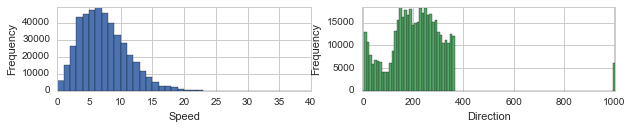

In [5]:
plot_speed_and_angle_distribution(df.speed, df.dir)

In [6]:
# Dir [10,360]=> [0,350]
df['dir'] = df['dir'].apply(lambda x: x%360 if x < 999 else x) 
# Convert Windrose coordianates to Polar Cooridinates 
df['dir_windrose'] = df['dir']
df['dir'] = df['dir'].apply(lambda x: (90 - x)%360 if x < 999 else x)
df.describe()

,date,HrMn,dir,speed,dir_windrose
count,4.509690e+05,450969.000000,450969.000000,450969.000000,450969.000000
mean,2.000358e+07,1152.688012,204.787735,7.263098,204.658551
std,1.089499e+05,668.366762,128.607443,3.834424,133.383841
min,1.980010e+07,0.000000,0.000000,0.000000,0.000000
25%,1.991013e+07,600.000000,130.000000,4.600000,140.000000
50%,2.002051e+07,1120.000000,200.000000,6.700000,200.000000
75%,2.011022e+07,1700.000000,270.000000,9.800000,270.000000
max,2.015080e+07,2350.000000,999.000000,38.600000,999.000000


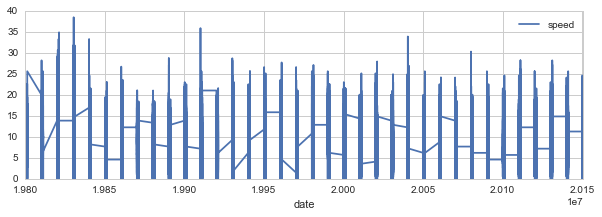

In [7]:
df.plot(x='date', y='speed',legend=True,figsize=(10,3))

### 1.2.1 Unit Detection

True


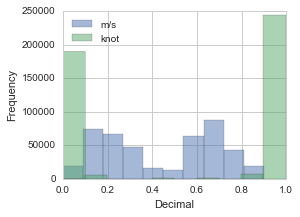

In [8]:
# Detect data stored in knot or m/s
## For data stored originally in knot, the data would cluster at 0.1 and 0.9
df['decimal'] = df.speed % 1 
df.decimal.hist(alpha=0.5, label='m/s', figsize=(4,3))
knot_unit = True if len(df.query('decimal >= 0.2'))/len(df) > 0.3 else False

# Using unit in knot instead of m/s
if knot_unit:
    df['speed']=df['speed']*1.943845
    df['decimal'] = df.speed % 1 
    df.decimal.hist(alpha=0.5,label='knot')
    # need more elaboration, some is not near an integer
    df['speed']=df['speed'].apply(lambda x: int(round(x)))
    plt_configure(xlabel='Decimal',ylabel='Frequency',legend={'loc':'best'})

print knot_unit

### 1.2.2 Sampling Type Selection

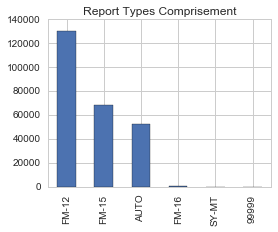

In [9]:
sample_type = df.query('date > 20000000')['type']
sample_type.value_counts().plot(
    kind = 'bar', title = 'Report Types Comprisement', figsize=(4,3))

report_type_most_used = sample_type.value_counts().argmax()
df = df.query("type==@report_type_most_used")

### 1.2.3 Sampling Time Selection

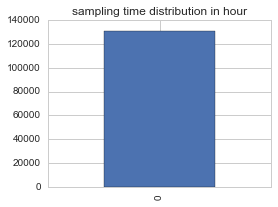

In [10]:
df['sample_time'] = df.HrMn % 100 
sample_time = df.query('date > 20000000')['sample_time']
sample_time.value_counts().plot(
    kind = 'bar', title = 'sampling time distribution in hour', figsize=(4,3))

sampling_time_most_used = sample_time.value_counts().argmax()
df = df.query("sample_time==@sampling_time_most_used")
df.drop(['sample_time'], 1,inplace=True)

In [11]:
df['HrMn'].value_counts().sort_index()

0       12295
100     12311
200     12304
300     12371
400     12337
500     12311
600     12365
700     12117
800     11681
900     11194
1000    10716
1100    10715
1200    11060
1300    11287
1400    11561
1500    11973
1600    12119
1700    12204
1800    12334
1900    12285
2000    12294
2100    12395
2200    12322
2300    12323
Name: HrMn, dtype: int64

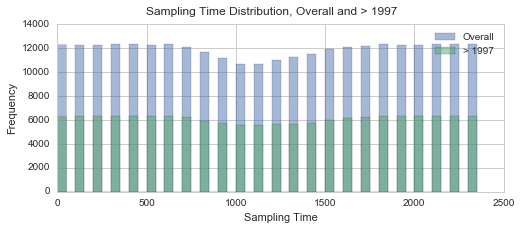

In [12]:
MID_YEAR = (min(df.date)//10000+max(df.date)//10000)//2
bins=arange(min(df.HrMn), max(df.HrMn) + 100, 50)

df['HrMn'].plot(
    kind='hist', alpha=0.5,bins=bins, label='Overall')

df.query('date > @MID_YEAR * 10000')['HrMn'].plot(
    kind='hist', alpha=0.5,bins=bins, label='> %s' %  MID_YEAR )

plt_configure(xlabel='Sampling Time', ylabel='Frequency', legend={'loc':'best'}, figsize=(8, 3), 
              title = 'Sampling Time Distribution, Overall and > %s ' %  MID_YEAR)

## 1.3 Data Wrangling

### 1.3.1 Artefacts handling

#### 1.3.1.1 wrong direction record

In [13]:
display(df.query("(dir % 10 >= 0.1) & (dir != 999)"))
df = df.query('(dir % 10 <= 0.1) | (dir == 999)')

,date,HrMn,type,dir,speed,wind_type,dir_windrose,decimal


#### 1.3.1.2 sudden increase in speed

,date,HrMn,type,dir,speed,wind_type,dir_windrose,decimal,incre,incre_reverse
184033,19910103,600,FM-12,200,70,N,250,0.978420,44.0,46.0
317048,20040421,1100,FM-12,290,66,N,160,0.090730,33.0,32.0
107869,19831018,1400,FM-12,210,61,N,240,0.036733,31.0,24.0
160804,19890213,1500,FM-12,160,56,N,290,0.982736,6.0,6.0
210235,19930121,2100,FM-12,180,56,N,270,0.982736,8.0,6.0
430861,20111208,1400,FM-12,180,55,N,270,0.010814,3.0,6.0
82329,19810227,400,FM-12,320,55,N,130,0.010814,19.0,22.0
210077,19930117,500,FM-12,180,55,N,270,0.010814,12.0,3.0
110610,19840121,1900,FM-12,310,54,N,140,0.038891,4.0,2.0
430859,20111208,1200,FM-12,190,54,N,260,0.038891,2.0,2.0


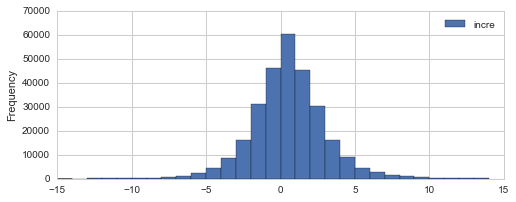

In [14]:
# sudden increse
df['incre'] = df.speed.diff(1)
df['incre'].fillna(0, inplace=True)
df['incre_reverse'] = df.speed.diff(-1)
df['incre_reverse'].fillna(0, inplace=True)

display(df.sort_values(by='speed',ascending=False).head(10))
df['incre'].plot(kind='hist', bins=arange(-15, 15), legend=True, figsize=(8, 3))

In [15]:
incre_threshold = 20 if knot_unit else 10
print 'sudden increase number', len(df.query('(incre > @incre_threshold )&(incre_reverse > @incre_threshold )'))
df = df.query('(incre < @incre_threshold )|(incre_reverse < @incre_threshold )')

sudden increase number 20


After Simple Aretefacts Handling

In [16]:
# Check the max speed
df.sort_values(by='speed',ascending=False).head(10)

,date,HrMn,type,dir,speed,wind_type,dir_windrose,decimal,incre,incre_reverse
210235,19930121,2100,FM-12,180,56,N,270,0.982736,8.0,6.0
160804,19890213,1500,FM-12,160,56,N,290,0.982736,6.0,6.0
430861,20111208,1400,FM-12,180,55,N,270,0.010814,3.0,6.0
82329,19810227,400,FM-12,320,55,N,130,0.010814,19.0,22.0
210077,19930117,500,FM-12,180,55,N,270,0.010814,12.0,3.0
430859,20111208,1200,FM-12,190,54,N,260,0.038891,2.0,2.0
110610,19840121,1900,FM-12,310,54,N,140,0.038891,4.0,2.0
244228,19961106,500,FM-12,210,53,N,240,0.872584,34.0,5.0
356123,20080109,500,FM-12,170,53,N,280,0.872584,13.0,15.0
228654,19950117,2200,FM-12,290,52,N,160,0.900661,2.0,4.0


### 1.3.2 Re-distribute angle, for un-evenly sectored data
For some dataset, the 16 sectors are not record properly,

e.g. the sectors are [0,20,30,50], need to redistribute the angle into 22.5

In [17]:
display(df['dir'].value_counts().sort_index())
effective_column = df.query('dir < 999')['dir'].value_counts()[df['dir'].value_counts() > 30].sort_index()
SECTOR_LENGTH = 360/len(effective_column)
print len(effective_column), SECTOR_LENGTH

0       2699
10      2654
20      4002
30      4234
40      4329
50      3762
60      4960
70      6444
80      8233
90      8046
100     8282
110     6898
120     7279
130     6682
140     7703
150     8125
160     9878
170     9622
180    10488
190    10516
200    11582
210    10709
220    11447
230     9616
240     9666
250     9315
260    11398
270    10445
280    11494
290    10495
300    11684
310     9709
320     8390
330     5595
340     3994
350     2669
999     3807
Name: dir, dtype: int64

36 10.0


In [18]:
if len(effective_column) == 16:    
    # For some dataset, the angle is not evenly distributed, so there is a need to redistribute
    original_angle = list(effective_column.sort_index().index)
    redistributed_angle = linspace(0,360,num=17)[:-1]
    df['dir'].replace(to_replace=original_angle, value=redistributed_angle, inplace=True)
    display(df['dir'].value_counts().sort_index())

### 1.3.4 Dir 999 Handling (Zero Speed and Variable Direction)

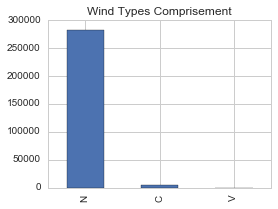

In [19]:
df['wind_type'].value_counts().plot(
    kind = 'bar', title = 'Wind Types Comprisement', figsize=(4,3))

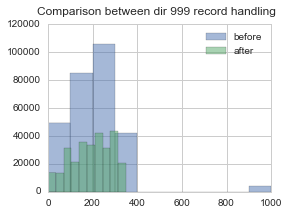

In [20]:
df['dir'].plot(kind='hist', alpha=0.5, label='before')
df['dir'] = df.apply(lambda x: np.nan if x.dir == 999 else x.dir, axis=1)
df['dir'] = df['dir'].interpolate()//SECTOR_LENGTH*SECTOR_LENGTH
df['dir'].plot(kind='hist', alpha=0.5, label='after')
plt_configure(title='Comparison between dir 999 record handling', figsize=(4,3), legend={'loc':'best'})

### 1.3.5 Time Shift Comparison

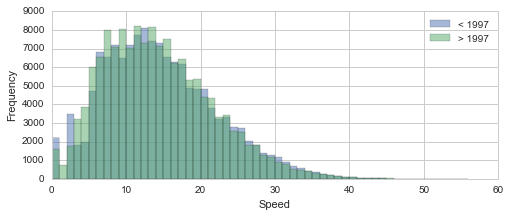

In [21]:
DIR_REDISTRIBUTE = 'even'
if DIR_REDISTRIBUTE == 'even':
    DIR_BIN = arange(-5, 360, 10) 
elif DIR_REDISTRIBUTE == 'round_up':
    DIR_BIN = arange(0, 360+10, 10) 

# Comparison between mid_year, looking for: 
# 1. Odd Even Bias
# 2. Time Shift of Wind Speed Distribution
bins = arange(0, max(df.speed) + 1)
df.query('date < @MID_YEAR * 10000')['speed'].plot(
    kind='hist', alpha=0.5,bins=bins, label='< %s' % MID_YEAR)

df.query('date > @MID_YEAR * 10000')['speed'].plot(
    kind='hist', alpha=0.5,bins=bins, label='> %s' % MID_YEAR)

plt.suptitle('Speed Comparison between year < %s, > %s ' % (MID_YEAR, MID_YEAR), fontsize = 14)
plt_configure(xlabel='Speed', ylabel='Frequency', legend=True, figsize=(8, 3))

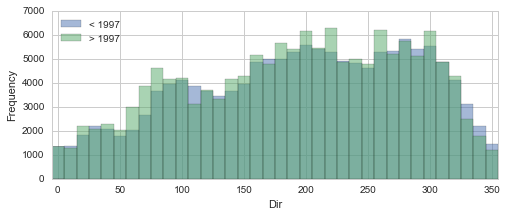

In [22]:
df.query('date < @MID_YEAR * 10000')['dir'].plot(
    kind='hist', alpha=0.5,bins=DIR_BIN, label='< %s' % MID_YEAR)

df.query('date > @MID_YEAR * 10000')['dir'].plot(
    kind='hist', alpha=0.5,bins=DIR_BIN, label='> %s' % MID_YEAR)

plt.suptitle('Dir Comparison between year < %s, and > %s ' % (MID_YEAR, MID_YEAR), fontsize = 14)
plt_configure(xlabel='Dir', ylabel='Frequency', legend={'loc':'best'}, figsize=(8, 3),tight='x')

1985 - 1989


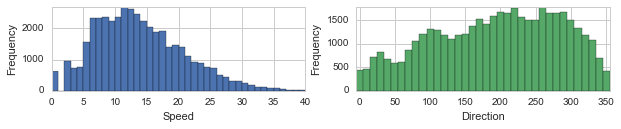

1990 - 1994


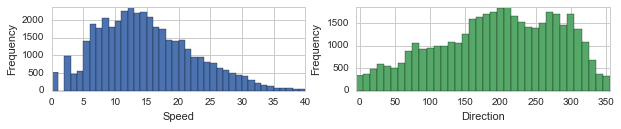

1995 - 1999


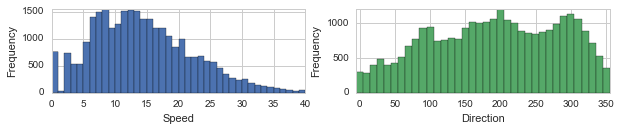

2000 - 2004


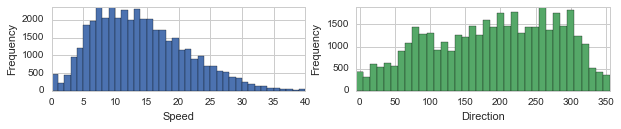

2005 - 2009


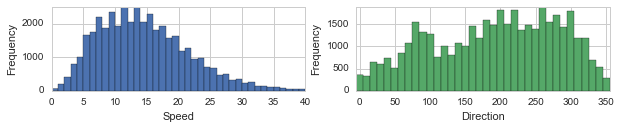

2010 - 2014


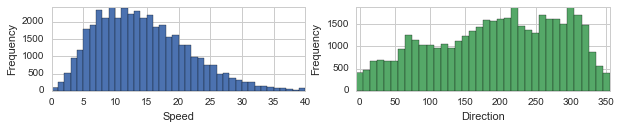

In [23]:
# Inspect the time shift of speed and degree distribution, and odd-even bias
check_time_shift(df)

 Too many zeros
True 0.013261240156


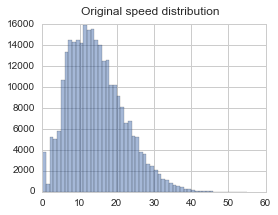

In [24]:
with_too_many_zero, null_wind_frequency = is_with_too_many_zero(df)
print with_too_many_zero, null_wind_frequency
with_too_many_zero = False
if with_too_many_zero:
    df = df.query('(speed > 0)')

## 1.4 Re-distribute Direction and Speed (Optional)
e.g. Dir 50 -> -45 ~ 55, to make KDE result better

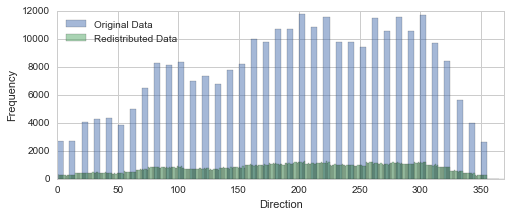

In [25]:
# Randomize the angle degree, to form a better KDE estimation
df = randomize_angle(df, DIR_REDISTRIBUTE, SECTOR_LENGTH)

Redistribute upward, e.g. 0 -> [0,1]


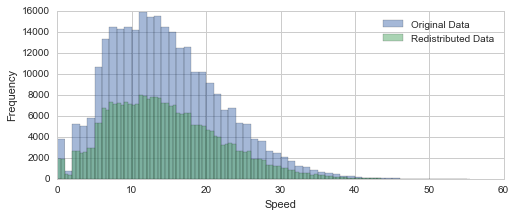

In [26]:
df, speed_redistribution_info = randomize_speed(df, with_too_many_zero)

## 1.5 Generate (x,y) from (speed,dir)

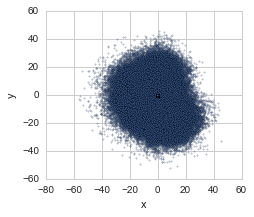

In [27]:
df['x'] = df['speed'] * cos(df['dir'] * pi / 180.0)
df['y'] = df['speed'] * sin(df['dir'] * pi / 180.0)
fig, ax = plt.subplots()
ax.set_aspect('equal')
df.plot(kind='scatter', x='x', y='y', alpha=0.35, ax=ax, s=2)
plt.gcf().set_size_inches(4, 3)

## 1.6 Re-select data, and overview of the clean dataset

In [28]:
## Summery of the data selection
print 'Knot unit?', knot_unit
print 'Incre_threshold for artefact detection:', incre_threshold
print 'Report type used:', report_type_most_used
print 'Sampling time used:', sampling_time_most_used
print 'with too many zero?', with_too_many_zero
print 'Speed redistribution info:', speed_redistribution_info

df_all_years = df # for later across-year comparison
df = df.query('(date >= 20100000) & (date < 20150000)')
df.describe()

Knot unit? True
Incre_threshold for artefact detection: 20
Report type used: FM-12
Sampling time used: 0
with too many zero? False
Speed redistribution info: Redistribute upward, e.g. 0 -> [0,1]


,date,HrMn,dir,speed,dir_windrose,decimal,incre,incre_reverse,x,y
count,4.285700e+04,42857.000000,42857.000000,42857.000000,42857.000000,42857.000000,42857.000000,42857.000000,42857.000000,42857.000000
mean,2.012073e+07,1149.018830,193.657597,14.395060,191.368645,0.546438,0.000280,-0.000303,-2.261726,-2.882679
std,1.413509e+04,693.169177,90.968242,7.309399,102.886477,0.450145,2.536296,2.536282,10.593906,11.618671
min,2.010010e+07,0.000000,-4.997949,0.009423,0.000000,0.000000,-23.000000,-29.000000,-55.810789,-48.280264
25%,2.011040e+07,500.000000,122.578361,8.796884,130.000000,0.051839,-1.000000,-1.000000,-9.373803,-11.030114
50%,2.012070e+07,1100.000000,202.321542,13.504399,200.000000,0.911451,0.000000,0.000000,-2.126883,-3.084906
75%,2.013100e+07,1800.000000,270.664996,18.978956,270.000000,0.967607,1.000000,1.000000,5.021953,5.554362
max,2.014123e+07,2300.000000,354.969136,55.941257,999.000000,0.997842,29.000000,23.000000,36.614210,37.300161


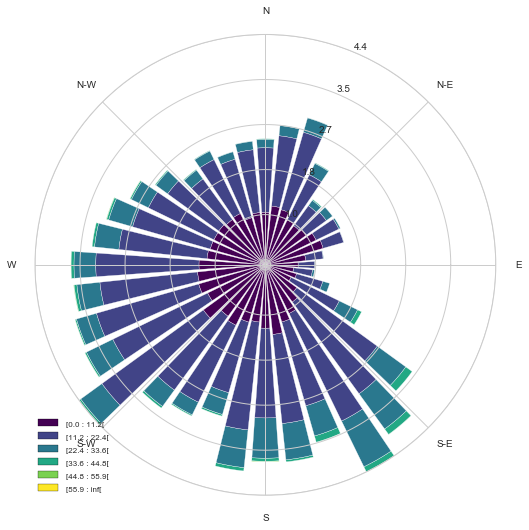

In [29]:
# 90 degree is in east
ax = WindroseAxes.from_ax()
viridis = plt.get_cmap('viridis')
ax.bar(df.dir_windrose, df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36, cmap=viridis)
ax.set_legend()

In [30]:
ax, _params = WindAxes.from_ax().pdf(df.speed, bins=arange(0, max(df.speed)))
weibull_params = sp.stats.exponweib.fit(df.speed, floc=0, f0=1)
plt_configure(figsize=(4,3),xlabel='V',ylabel='PDF')

fig,ax = plt.subplots()
ecdf = sm.distributions.ECDF(df.speed)
x = linspace(0, df.speed.max())
y = ecdf(x)
plot(log(x), log(-log(1-y)),'o', label='ECDF')

k_shape, lamb_scale = weibull_params[1], weibull_params[3]
y=1-exp(-(x/lamb_scale)**k_shape) # cdf
plot(log(x), log(-log(1-y)),'-', label='Weibull')
plt_configure(legend={'loc':'best'},figsize=(4,3))
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARwAAADZCAYAAADypo9TAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzt3XlcVXX+x/HXveyIiKC4i4hCKu6mNk5qOm6TTSlguORY
NP20tGVqzK3RFsMWm7SRRk0ryRkbk3KZNC3cU5FFSk1QRK+yKZuyqSzn98eVKy6scu+53Pt5Ph49
4HKX84bf+P6de+45349GURQFIYQwAa3aAYQQ1kMKRwhhMlI4QgiTkcIRQpiMFI4QwmSkcIQQJmNr
zBdXFIVFixaRkJCAvb09ixcvpl27dob7IyMjCQsLw9bWloCAAIKCggBYtWoVkZGRFBcXM2nSJAIC
AowZUwhhIkYtnB9//JEbN26wYcMG4uPjCQ0NJSwsDICSkhKWLFlCREQEDg4OTJw4keHDh3PmzBni
4uLYsGEDhYWFrF271pgRhRAmZNTCiYmJ4eGHHwagZ8+eHD9+3HBfUlISXl5euLi4ANCvXz+ioqI4
efIkvr6+PP/88xQUFDB79mxjRhRCmJBRCyc/P5/GjRvf2pitLWVlZWi12rvuc3Z2Jj8/n5ycHFJT
U1m5ciUXLlxgxowZ7Nixw5gxhRAmYtTCcXFxoaCgwHC7vGzK78vPzzfcV1BQgKurK25ubvj4+GBr
a4u3tzcODg5kZ2fj7u5e6XZiYmKM90sIIarUt2/fGj/WqIXTp08fdu/ezejRozl27Bi+vr6G+3x8
fDh//jxXr17F0dGR6OhoQkJCsLe3Jzw8nGnTppGRkcG1a9do2rRptduqzS9tCjExMZKpBswxE5hn
LnPNVBtGLZwRI0Zw8OBBgoODAQgNDWXbtm0UFRURFBTE3LlzeeaZZ1AUhcDAQDw9PfH09CQ6OprA
wEAURWHhwoVoNBpjxhRCmIhRC0ej0fDmm2/e9jNvb2/D90OHDmXo0KF3Pe+1114zZiwhhErkxD8h
hMlI4QghTEYKRwhhMlI4QgiTkcIRQpiMUT+lsialpaUkJSUB+nOMhBB3k8KpJ0lJSfj5JQOQkKBy
GCHMlBROvfKu/iFCWDEpHBOo+HYL9G+5bGxsVEwkhDqkcEzg1tstbyCZhARuu65MCGshhVND97+X
4g1IyQjrJoVTQ7KXIsT9k8KplbrtpdwovQE+UdB5BTSL5eWDjel2rhtTe06le4vu9R9TCDMlhWNk
hy8eZvKOyfDUWcPPtutgu247Hx76kMFeg1kxZgX2V+wBOaAsLJsUjhG9s+8dFu5ZiKIoEBMEx6dD
ihv7owrJdMgk7GgYu87uov/q/hRtmgHHRspbNWHR5NIGI1l7ei1v7H6Ddq7tCB8eDlvfgeRhcMMF
TydPnnjgCXY+tZONQRux0drAEx/B4O1qxxbCqKRwjGB94nrCEsJo36Q9+57ex4OeD1b62MCugXw3
+jvIbQPDlvHFqS9MF1QIE5PCqW+tf2Vx7GI8HDz4aepPtG/SvtqntHNpB19+AVc9CY0L5T+//sf4
OYVQgRROfbIrgnGzKVVKebv323Ry73TPh5WWlpKYmGj4r7S0FHLaw7ovcLZ15rltz5GQKRdkCcsj
hVOfhi+F5meZ6juV/s36V/ownU6Hn18yfn7g55eMTqfT35Hpwzv93yH/Rj4TvplAUXGRiYILYRpm
OVt8/Pjxhomcbdu25d133zVmzHqRkJsA/dfD5Y68GvQqxUXF1Tyj4jk9yYafPur1KInXE/lXzL9Y
ELmApaOWGiuyECZndrPFy4tm3bp1xoxW75bGLwVtGfwwB8cXHSmmusKp3EejPuLH5B/5+MjHBHcL
pklhE8N9cp6OaMiM+paqprPF7ezs6Nu3L0ePHuXUqVMUFhYSEhLCtGnTiI+PN2bEerE7eTd7U/dC
8gA4M/i+X8/Jzol/PfovypQyno54Gr8uZwxvvypezyVEQ2PUwqlstvi97mvUqBF5eXk4OTkREhLC
mjVrWLRoEa+99prhOeZIURRm/zhbf2PX34D6Gdo3vONwpvacyomcE/DgQfRvv2S9HdGwmd1scS8v
L9q313+U3KFDB9zc3Lh8+TItWrSoclvGni9+/vx5wN9w+/jx4+Tl5XHk8hGiU6N5yPUhDqV2N9zn
5eVlyHTnc0+fPk3F8qh4u/x1Aaa2mMo32m8oHBIG8X+Da7ffXxfmOIfdHDOBeeYyx0y1YXazxTdt
2kRiYiILFy4kIyODgoICmjdvXu22jD1zueLeGIC/vz++vr4sWL8AgL8O/CtBFe7Lzc3Fzc0NgC5d
utz23M6dO1d6u/x1y83ImKE/PvTwu7Dr2bvurw1znU1tbpnAPHOZa6baMLvZ4oGBgcydO5dJkyah
1Wp59913DXtF5qS0tJRtUdvYcWYH/Zr3o5tbt9vuv3jxIgMG5ACwYwfU9O1Q+Tk65Sb7TGbpvn/D
gOUQNQZoU0+/gRCmZ3azxe3s7Pjwww+NGate6HQ6Hvv0E+gN0csfReej4+5SKb+dTE3pdDpGjy5/
brK+rH56Gca/DkP/CYTWQ3oh1GF+uw4NxJXiK9B9N2R1hsTgen718nN0bhbWr3+CS12h52Z0ebp6
3pYQpiOFU0eRmZFgWwxHZ4Bi5D+jooV9C0BbysqTK427LSGMSAqnThR+uPwDlNrBL1NMs8kTE+By
R75L/o5zuedMs00h6pkUTl20Ps65wnOQMAwKq/8ErV4oNrBvBiVKCUsOLDHNNoWoZ1I4ddF7k/5r
XIBpt3v8Udq5tOOLY19wqeCSabctRD2Qwqkt2yLovg0POw9IGmTabSs2PO33NNdLr7MiaoVpty1E
PZDCqa1OO8Axj2HNhkGZ6ZeEHtdxHO5O7qw4uoLC4kKTb1+I+yGFU1vd/gvA4Gb3f5FmXTjbOvN8
v+fJKsri87jPVckgRF1J4dSGXRH4bYXs9nRyvvdqfqYws/9MHGwcWHZkGWWK+V7YKsSdpHBqo9M+
sC+AE2PQaOrnqvC6aOHSgmD/YE5nn2Zn0k7VcghRW1I4tdFth/7ridHq5gBm9Z8FwCdRn6icRIia
k0F4VSgtLTUseJV/PR98d0NWJ0jvApxTNVvf1n15qO1DbD+9nV0xu/Bq7CWrAQqzJ3s4VUhKSrq5
2HkyW45vAfsiOBlIfS2ydb9m9Z+FgsLI+Z/KaoCiQZDCqZY34M3hnMP6mwl/UjVNRQFdA2ju2Bx6
/QR2LdWOI0S1pHBqQlNGVG4UFLhDSuXjX0zN3saeAJ8AcLoK3WRMsDB/Ujg10eo4OcU5kDhUf02T
iu4cohfQIQAUDfT9WtVcQtSEFE5N+O3Wf018RN0c3D1ErzSrFE4PhnbH+C3nN7XjCVElKZya8N2D
ncYOkn6ndpKb7ligK1q/ANh/zshMcmHepHCq45oOrU7S3bU73HBRO829nR4CV1qy7dw2Cm4UVP94
IVQihVPBncdHSktLwWc/AP3dzOdg8V0UGzg2noKSAjae3Kh2GiEqZdTCURSFhQsXEhwczNSpU7lw
4cJt90dGRhIYGEhwcDAbN97+DyUrK4uhQ4eSnFzzBcjv163zbvTHR3Q6HfgcBKCvm3mN57hLXAAa
NHwW+5naSYSolFELp+Js8VdffZXQ0FsTB8pni3/xxReEh4fz9ddfk52dbbhv4cKFODo6GjNeJW4d
HylVSqHjIbjSiraObVXIUgu5bfldy99x8MJBTmWeUjuNEPdkdrPFAd577z0mTpyIp6enMeNVK6kg
CZxzIWmQqhdr1lSgTyAAa2LXqJxEiHszu9ni3377LR4eHgwaNAhFUYwZr1qxV2L135h6Zb86+kOb
P+Dh5MG6X9ZRXFqsdhwh7mJ2s8XDw8MBOHjwIKdOneL111/n008/xcPDo8pt1cfM5TtngB9IO6A/
qS55IKdPR1P

# 2. Create input data, i.e. speed_set

In [31]:
# speed_set = array(zip(-df.x, -df.y)) # Adjust the direction to match for Cook's paper
SPEED_SET = array(zip(df.x, df.y))
if 'params' not in globals():
    NUMBER_OF_GAUSSIAN = 3
    FIT_METHOD = 'square_error'
    KDE_GRIDSEARCH = True
DEFAULT_BANDWDITH = 1.5 if knot_unit else 0.7
fig_list = []

In [32]:
FITTING_RANGE = []
fit_limit = ceil(df['speed'].quantile(.95))
fitting_axis_range = arange(-fit_limit, fit_limit+1, 1)
print fitting_axis_range

for i in fitting_axis_range:
    for j in fitting_axis_range:
        FITTING_RANGE.append([i,j])

[-28. -27. -26. -25. -24. -23. -22. -21. -20. -19. -18. -17. -16. -15. -14.
 -13. -12. -11. -10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.
   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.  16.
  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.]


In [33]:
plot_limit = ceil(df['speed'].quantile(.975))
PLOT_AXIS_RANGE = arange(-plot_limit, plot_limit+1, 1)

# 3. Kernel Density Estimation

In [34]:
sample = SPEED_SET
KDE_KERNEL = 'gaussian'
# KDE_KERNEL = 'tophat'
# bandwidth = 1

In [35]:
# The bandwidth value sometimes would be too radical
from sklearn.grid_search import GridSearchCV

if KDE_GRIDSEARCH == True:
    if knot_unit:
        bandwidth_range = arange(0.5,2,0.2)
    else:
        bandwidth_range = arange(0.4,1,0.1)

    grid = GridSearchCV(neighbors.KernelDensity(kernel = KDE_KERNEL),
                        {'bandwidth': bandwidth_range},
                        n_jobs=-1, cv=4) 
    grid.fit(sample)
    bandwidth = grid.best_params_['bandwidth']

In [36]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH
    
kde = neighbors.KernelDensity(bandwidth=bandwidth,kernel = KDE_KERNEL).fit(sample)

points = FITTING_RANGE
# very slow if the dataset is too large, e.g. 100,000
# kde returns log prob, need to convert it
kde_result = exp(kde.score_samples(points))
print 'bandwidth:', bandwidth, len(kde_result)
print kde_result[:5]

bandwidth: 1.9 3249
[  3.96387989e-06   4.77264450e-06   5.96620548e-06   7.17252751e-06
   8.02879038e-06]


In [37]:
# Plot jPDF
X = Y = PLOT_AXIS_RANGE
# Can't work if pass as generate_Z_from_X_Y(X,Y, exp(kde.score_samples())), need to use lambda
# see http://stackoverflow.com/questions/21035437/passing-a-function-as-an-argument-in-python
kde_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde.score_samples(coords)))
colorbar_lim = 0, kde_Z.max()

plot_3d_prob_density(X,Y,kde_Z)

fig_kde,ax1 = plt.subplots(figsize=(4,3))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x', ylabel='y',ax=ax1)

with sns.axes_style({'axes.grid' : False}):
    fig_hist,ax2 = plt.subplots(figsize=(4,3))
    _,_,_,image = ax2.hist2d(df.x, df.y, bins=PLOT_AXIS_RANGE, cmap='viridis',)
    ax2.set_aspect('equal')
    plt.colorbar(image)
    plt_configure(ax=ax2, xlabel='x',ylabel='y')
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAUEAAAFBCAYAAADpDh0xAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXu0JGV9LvzUtW+7954ZLiM3AQkkglzk8sWjeEmABDnn
RAWJQBSNxlsU1xGOnyHrUybLY5DvZJ34nSBLEiV6SHJEs1AMcS2VQEANiYKBRM0ZFAOMyDAMM3vv
7q6qrtv7/VH9e/utt6uqq7qr9+6eXc9as2bv3VXVb1dXPfW7Pj+FMcZQoUKFClsU6mYvoEKFChU2
ExUJVqhQYUujIsEKFSpsaVQkWKFChS2NigQrVKiwpVGRYIUKFbY0KhKsUKHClkZFghUqVNjSqEiw
QoUKWxoVCVaoUGFLoyLBChUqbGlUJFihQoUtjYoEK1SosKVRkWCFChW2NCoSrFChwpZGRYIVKlTY
0qhIsEKFClsaFQlWqFBhS6MiwQoVKmxpVCRYoUKFLY2KBCtUqLClUZFghQoVtjQqEqxQocKWRkWC
FSpU2NKoSLBChQpbGhUJVhgBYwxhGIIxttlLqVBh5tA3ewEV5gthGML3fTiOA0VR+N+bzSY0TdvE
lVWoMBtUJFiBw7ZtdDod1Ot1qKoKxhhs20YQBAjDEKqqQtd1/n9FihUOBVQkWAGMMQRBAM/zEAQB
+v0+J70wDAGAW4W+74Mxhn6/D1VVoWlaRYoVFhoKqwI/Wxrk/oZhiH6/D8uyErdTFAWapvF/qjoM
J9MlVJFihUVERYJbGL7vIwgCAEC/30ev1wMAaJqGRqOBIAjgOE5igqQixQqHCioS3IJgjMUI0LIs
9Pt9/nqj0YCu67GYYLPZ5G4z/RNBpEgxQ5EUXdeF67poNBqo1WoVKVaYK1QxwS2GMAzheR4ntG63
izAMoWkaarVapjtMlh0wLKMRSdH3ffi+D2BoBWqaxi1DIt8qplhhnlCR4BaBaMURCRHh1Wo1NJtN
TmB5ILrDdHyZFIlwCfSzpmlQFCWTFE3TjJXoVKgwK1QkuAXgui583+dlL71eD57nQVEUtFotmKY5
9XtkkaJoeZIbLVqK40hR0zQYhlGRYoWZoCLBQxxBEGBtbQ2+76PdbqPX6yEMQ+i6jqWlpVjsjlBG
mFgmRdd1YZomJ8MwDGOWYhYpep4Hx3HgeR40TUOz2axIsUJpqEjwEIXs/gJAp9MBECU+6vV6LhKh
bRhjU5MOxf7k9eUlRdd1edLFcZzKUqxQCioSPAQh1v6RWwpEhLa0tATDMDZ5hdFadF0vRIq0He0v
W4oVKVaYBBUJHmKgLC0QJSJ6vR4njuXl5cwM7GaSRh5SpL/3er1c7jMlWSpSrJCFigQPEWTV/lH7
2yKRQBIpUjE3fR7RUpQLtxVFiW1DiRaxnrEqyakAVCR4SECs/QvDEN1uF0EQQFVVLC0twbZtbknl
AcX/5qmOnghcVdXEwm25gDupm0VUyDFNkwtFENku0kOiQnmoSHDBIVp/rutya4lq/xRFmZubu0xS
Hec+p5GiCNFSpGLwihS3HioSXFC4rgvbtrlr1+v14LouAKDVaqFWq23yCofYCDLJIkV6UIikKLrR
oqVYkeLWQ0WCCwgSNrAsC/V6ndf+aZqGpaWl1FjXOEvsULrJRVKs1Wq8cJsIkTHGHxpAuvtckeKh
j4oEFwhy1wUAOI4DAKjX62g0Gok3ZnWzghOYoigIggCGYUBV1cIxRSJF2r5er6Ner/MMdYXFQ0WC
CwK59o/IDwCWlpZKaX1LglgsfShAlPkyDIPXTMp9z+NIkchQ0zSedKLXDMOoSHGBUJHgAoD6b4Eo
EdLtdvnNXK/XSydAxtghQ3p5QZZiHlIUk00UhpBLcoAhcVI5TkWK84mKBOcYcu2fbdvcAjRNE67r
FrqxihDbvJXIbDREUqSHQlLxtuu63CIUC7dFUqTYozyfpSLF+UBFgnMKufav1+txJZilpSUe2C+7
7ASIyJKSAVuZCAlEaiIpEvmRMo+opSirbtP+RKAiKVICR1bnrrBxqEhwDiFaf2Lrm2maaDabUFU1
ptM3DkUtDmo9k/9GRLDVIZ5PUsqWLcUsUqRzSGGOfr+PWq0WK96uLMWNQ0WCcwTf99HpdKCqKld5
pta3ZrOJWq3Gb4xJbpBxVh1ZKIwxLq8vkjFZh5sR55pnizTJUsxS3RZJUfxcoqVI21SkOHtUJDgn
oIvfcRwYhoF+v48gCKau/csDxliMcEmzLwxDOI4D3/djpJgmo78RN+oiEEEe1W3xHALgP8uWYkWK
s0dFgpuMJN0/ckXF1rdpkLU/zRmhXmOaNyzvS2Uf42T0N5oUFwFFVbez3Gff9ytSLBkVCW4i5No/
27b5a+Nq/8q44MUxm7VaDY1GA6urq5n7JN3QWTqAogU7zy7tRiJNdRtAoqWY9mARSZF+13Wdx40r
UsyHigQ3CWLtnzj1DYiyhrMofhanvonuL/Uap80XFvdNen2ckAHBdV3u4ouSVxuJeSViWXW7qLVN
oQsKW4iWInXHVKSYjIoENxhy7Z/jONwCrNfrcBxnZrV/QNz9HRdvnARJpNjv93l2WSZGcuXEUpKN
wLTvIypcl32copP8ZIJLshQrUkxHRYIbCNn97Xa7nByWlpag63qsHS4LRS5g2tbzPHS7XQDZ8cay
aw81TYPv+zBNE5qmFS4l2erIQ4oE3/dhWVam+yxP8qMi7q1KihUJbhBE609sfTMMA61Wi9eaAeW7
bHQ82f3dDGR1YhAhyqRIN2mFCEmk6Hket/jGDa2SEy39fp9b8GKiZaugIsEZg2r/NE2DaZqx1reN
qP0j2S0guhna7XauC3yjNACL1NcBQ2u6yoYOIRaxkyhE0Ul+APjM5/X1dYRhyK+VQ50UKxKcIahv
lOTcHceJyd5T3ExGHkswDwGI2V8AXPJpmmPOElluX5KCzqFQjlNWbFHEJJP8xPNI550eQKL7fCha
ihUJzgBJun9UxmCaJlqt1kxvWDn7W6vVuMuzSBBJ0TCM2JS5tHKcjco8z2uWOQlFSZFAyTNxkh8l
ug4lUqxIsGSIyQ8Asdq/PLG4ojeufDMmZX/paV7kmPN6kyuKws9h0WFLsyDFeXmwFLEo85AiMBTs
TTqPhxIpViRYIshto4tKrv3Lm4yYlIDk4mfK/lJMbV6JbVKk3cziTBG5HGdWyadFhnweSbBDji0S
8pKiHKecV1QkWALk2r9+vw/LsgAUd0Un2S6t+LkMLJKytHwzJyVZCGJv9maW48wiJlgGprW46Z7o
9Xq8F/3BBx/EkUceiTPPPHOzPlYiqrqDKSHOnKDaP8uyeO1fs9kEUIxEimwbhiHW19fR7/ehaRpW
VlZGCHCSmsJZYKOJlLLO9XodzWaTt5MRKExgWRZ6vR4Xi1gEwpcxSzKlhwt5F1TVQHqIJPJg2zZ6
vR5s2+bdQbQ/Ywzf/e538eSTT2Z+hhtuuAFXXHEFrr76auzZsyf2+r333os3vvGNuOKKK/ClL30p
1z433ngj7rjjjpH3eec738n/XlmCU0Cu/aOpb7quY2lpaUOsC3K3yxJbmAXmYU1UjqNp0UyQer0e
62DZbHWceQJjLPPaLTKKAIjujfvuuw+2baNer6ce95577oHruvjCF76ARx99FDfeeCNuueUWfoxP
fOITuPPOO1Gr1XDllVfiggsuwMMPP5y4z4EDB/DhD38YTz75JF70ohfF3ueTn/wkOp0O/70iwQng
eR4cx+E3itj61mg0+A0mIq91kUfNmdxfQl73N+8aqPf0UMYkrWlyGUmFCGmkSEbCY489hg996EMA
gK997Wv46le/il/5lV/BpZdeGrvOHn74Ybzyla8EAJx55pn4wQ9+wF97/PHHcfzxx2NpaQkAcO65
5+K73/0uHnn

In [38]:
kde_cdf = cdf_from_pdf(kde_result)

# 4. GMM by Expectation-maximization

In [39]:
sample= SPEED_SET
clf = mixture.GMM(n_components=NUMBER_OF_GAUSSIAN, covariance_type='full')
clf.fit(sample)
print clf.converged_

True


In [40]:
gmm_em_result = read_gmm_em_result(clf)
pretty_print_gmm(gmm_em_result)  

,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.346,-10.104,-3.450,9.009,9.828,-0.147
2,0.331,-0.074,5.946,7.668,8.860,0.147
3,0.323,3.898,-11.308,9.563,9.102,-0.241


GMM Plot Result
0.346099513449 [[-10.10440595  -3.44953138]] [  8.58592007  10.19942093] -150.287557003
0.330671457536 [[-0.07407228  5.94594965]] [ 7.39089144  9.09242858] 157.301297212
0.323229029015 [[  3.89784879 -11.3076293 ]] [  8.10944927  10.41836458] -129.199637621


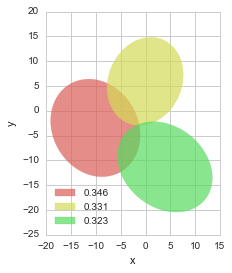

In [41]:
fig,ax = plt.subplots(figsize=(5,4))
plot_gmm_ellipses(gmm_em_result, ax=ax)

In [42]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(clf.score_samples(coords)[0]))

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = exp(clf.score_samples(points)[0])
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x',ylabel='y', colorbar_lim=colorbar_lim)
fig_em = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,pdf_Z,xlabel='x',ylabel='y', colorbar_lim=colorbar_lim)
fig = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,residual_Z,xlabel='x',ylabel='y')
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAUEAAAFBCAYAAADpDh0xAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvX20LGV9Lvi89dFfu/fe5/DlICio0VGQb7zJElAMkAFv
bkxAVIigo9eIUcwIy2VwonCvK0HXyky8E2SCMcYE772iuSrkxFkmRAbQYPSQwVw1FzFEclQQDufs
vbvro+vrnT+qf2+/9XZVdVV39d7dZ9ez1lnnnO6q6rerq576fT4/xjnnqFGjRo1dCm2nF1CjRo0a
O4maBGvUqLGrUZNgjRo1djVqEqxRo8auRk2CNWrU2NWoSbBGjRq7GjUJ1qhRY1ejJsEaNWrsatQk
WKNGjV2NmgRr1Kixq1GTYI0aNXY1ahKsUaPGrkZNgjVq1NjVqEmwRo0auxo1CdaoUWNXoybBGjVq
7GrUJFijRo1djZoEa9SosatRk2CNGjV2NWoSrFGjxq5GTYI1atTY1ahJsEaNGrsaNQnWqFFjV6Mm
wRo1auxq1CRYo0aNXY2aBGuMgXOOKIrAOd/ppdSoMXcYO72AGouFKIoQBAFc1wVjTLze6XSg6/oO
rqxGjfmgJsEaAo7joNfrodVqQdM0cM7hOA7CMEQURdA0DYZhiL9rUqxxJKAmwRrgnCMMQ/i+jzAM
MRgMBOlFUQQAwioMggCccwwGA2iaBl3Xa1KssdRgvA787GqQ+xtFEQaDAWzbTt2OMQZd18UfTRuF
k+kSqkmxxjKiJsFdjCAIEIYhAGAwGMCyLACArutot9sIwxCu66YmSGpSrHGkoCbBXQjOeYIAbdvG
YDAQ77fbbRiGkYgJdjod4TbTHxlEihQzlEnR8zx4nod2u41ms1mTYo2FQh0T3GWIogi+7wtC6/f7
iKIIuq6j2WzmusNk2QGjMhqZFIMgQBAEAEZWoK7rwjIk8q1jijUWCTUJ7hLIVhyREBFes9lEp9MR
BFYEsjtMx1dJkQiXQP/WdR2MsVxSbDQaiRKdGjXmhZoEdwE8z0MQBKLsxbIs+L4PxhhWVlbQaDRm
/ow8UpQtT3KjZUtxEinqug7TNGtSrDEX1CR4hCMMQ2xubiIIAqyursKyLERRBMMw0O12E7E7QhVh
YpUUPc9Do9EQZBhFUcJSzCNF3/fhui5834eu6+h0OjUp1qgMNQkeoVDdXwDo9XoA4sRHq9UqRCK0
Ded8ZtKh2J+6vqKk6HmeSLq4rltbijUqQU2CRyDk2j9yS4GY0LrdLkzT3OEVxmsxDKMUKdJ2tL9q
KdakWGMa1CR4hIGytECciLAsSxDH2tpabgZ2J0mjCCnS65ZlFXKfKclSk2KNPNQkeIQgr/aP2t+W
iQTSSJGKuen7yJaiWrjNGEtsQ4kWuZ6xLsmpAdQkeERArv2Logj9fh9hGELTNHS7XTiOIyypIqD4
3yLV0ROBa5qWWritFnCndbPICjmNRkMIRRDZLtNDokZ1qElwySFbf57nCWuJav8YYwtzc1dJqpPc
5yxSlCFbilQMXpPi7kNNgksKz/PgOI5w7SzLgud5AICVlRU0m80dXuEI20EmeaRIDwqZFGU3WrYU
a1LcfahJcAlBwga2baPVaonaP13X0e12M2NdkyyxI+kml0mx2WyKwm0iRM65eGgA2e5zTYpHPmoS
XCKoXRcA4LouAKDVaqHdbqfemPXNCkFgjDGEYQjTNKFpWumYIpEibd9qtdBqtUSGusbyoSbBJYFa
+0fkBwDdbreS1rc0yMXSRwJkmS/TNEXNpNr3PIkUiQx1XRdJJ3rPNM2aFJcINQkuAaj/FogTIf1+
X9zMrVarcgLknB8xpFcUZCkWIUU52URhCLUkBxgRJ5Xj1KS4mKhJcIGh1v45jiMswEajAc/zSt1Y
ZYht0UpkthsyKdJDIa142/M8YRHKhdsyKVLsUZ3PUpPiYqAmwQWFWvtnWZZQgul2uyKwX3XZCRCT
JSUDdjMREojUZFIk8iNlHllLUVXdpv2JQGVSpASOqs5dY/tQk+ACQrb+5Na3RqOBTqcDTdMSOn2T
UNbioNYz9TUigt0O+XySUrZqKeaRIp1DCnMMBgM0m81E8XZtKW4fahJcIARBgF6vB03ThMoztb51
Oh00m01xY0xzg0yy6shC4ZwLeX2ZjMk63Ik41yJbpGmWYp7qtkyK8veSLUXapibF+aMmwQUBXfyu
68I0TQwGA4RhOHPtXxFwzhOES5p9URTBdV0EQZAgxSwZ/e24UZeBCIqobsvnEID4t2op1qQ4f9Qk
uMNI0/0jV1RufZsFefvTnBHqNaZ5w+q+VPYxSUZ/u0lxGVBWdTvPfQ6CoCbFilGT4A5Crf1zHEe8
N6n2r4oLXh6z2Ww20W63sbGxkbtP2g2dpwMoW7CL7NJuJ7JUtwGkWopZDxaZFOn/hmGIuHFNisVQ
k+AOQa79k6e+AXHWcB7Fz/LUN9n9pV7jrPnC8r5p708SMiB4nidcfFnyajuxqESsqm6XtbYpdEFh
C9lSpO6YmhTTUZPgNkOt/XNdV1iArVYLruvOrfYPSLq/k+KN0yCNFAeDgcguq8RIrpxcSrIdmPVz
ZIXrqo9TdpKfSnBplmJNitmoSXAbobq//X5fkEO324VhGIl2uDyUuYBpW9/30e/3AeTHG6uuPdR1
HUEQoNFoQNf10qUkux1FSJEQBAFs2851n9VJflTEvVtJsSbBbYJs/cmtb6ZpYmVlRdSaAdW7bHQ8
1f3dCeR1YhAhqqRIN2mNGGmk6Pu+sPgmDa1SEy2DwUBY8HKiZbegJsE5g2r/dF1Ho9FItL5tR+0f
yW4B8c2wurpa6ALfLg3AMvV1wMiarrOhI8hF7CQKUXaSHwAx83lrawtRFIlr5UgnxZoE5wjqGyU5
d9d1E7L3FDdTUcQSLEIAcvYXgJB8muWY80Se25emoHMklONUFVuUMc0kP/k80nmnB5DsPh+JlmJN
gnNAmu4flTE0Gg2srKzM9YZVs7/NZlO4PMsEmRRN00xMmcsqx9muzPOiZpnTUJYUCZQ8kyf5UaLr
SCLFmgQrhpz8AJCo/SsSiyt746o3Y1r2l57mZY65qDc5Y0ycw7LDluZBiovyYCljURYhRWAk2Jt2
Ho8kUqxJsEKQ20YXlVr7VzQZMS0BqcXPlP2lmNqiEtu0yLqZ5ZkiajnOvJJPywz1PJJghxpbJBQl
RTVOuaioSbACqLV/g8EAtm0DKO+KTrNdVvFzFVgmZWn1Zk5LshDk3uydLMeZR0ywCsxqcdM9YVmW
6EV/6KGHcNxxx+GMM87Yqa+VirruYEbIMyeo9s+2bVH71+l0AJQjkTLbRlGEra0tDAYD6LqO9fX1
MQKcpqZwHthuIqWsc6vVQqfTEe1kBAoT2LYNy7KEWMQyEL6KeZIpPVzIu6CqBtJDJJEHx3FgWRYc
xxHdQbQ/5xzf+ta38MQTT+R+h5tvvhlvetObcO211+LAgQOJ97/2ta/h9a9/Pd70pjfhC1/4QqF9
br31Vtx1111jn/OOd7xDvF5bgjNArf2jqW+GYaDb7W6LdUHudlViC/PAIqyJynF0PZ4J0mq1Eh0s
O62Os0jgnOdeu2VGEQDxvXHffffBcRy0Wq3M4957773wPA+f+9zn8J3vfAe33norbr/9dnGMj370
o/jiF7+IZrOJq666ChdddBEefvjh1H0OHTqED3zgA3jiiSfwwhe+MPE5H//4x9Hr9cT/axKcAr7v
w3VdcaPIrW/tdlvcYDKKWhdF1JzJ/SUUdX+LroF6T49kTNOappaR1IiRRYpkJPzgBz/A+9//fgDA
V77yFdxzzz14zWteg8svvzxxnT388MO44IILAABnnHEGvvvd74r3/vmf/xknnXQSut0uAODcc8/F
t771LTzyyCO

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARsAAADZCAYAAAAQepQqAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnXtUVFea9p+6WKCAQmxRIglEBCWCFyCZTOIwrlGjTDpt
Z2JiIIasNEZ0jVlpLxU0MkFntCXdam5KVtLpbo3xQkKbYTqfX0+HxCk/NSuGmoAaQYwSUFQgIG0V
IpfifH9Un/JUcW51OaeqqPe3Vq1lndveBcXju9+99/NqGIZhQBAEoTBaf3eAIIjQgMSGIAhVILEh
CEIVSGwIglAFEhuCIFSBxIYgCFXQ+7sDBEF4B8Mw2LRpE86fPw+DwYCtW7finnvucZz/8ssvUVZW
Br1ejyeffBJPPfWU5D3btm3DpEmTsGTJEgDA/v378emnn0Kr1eKFF15ATk4OACA7OxuJiYkAgFmz
ZmH16tWiHSUIIoj5y1/+wqxfv55hGIapqalhVq5c6TjX39/PzJ8/n7FYLExfXx/z5JNPMh0dHYL3
dHR0MMuWLWPmz5/PHDp0iGEYhuns7GR++tOfMjabjbFarcw//uM/MgzDME1NTcyKFStk95OGUQQR
5JjNZvzDP/wDAGDGjBk4e/as49zFixeRkJCAyMhIjBgxAllZWTh16tSQe7777jsAwK1bt/DSSy/h
Zz/7meMZMTExqKyshFarRXt7O8LCwgAAZ8+eRWtrK/Lz81FYWIjGxkbRfvplGDU4OIji4mI0NjZC
q9Vi8+bNMBgMWL9+PbRaLZKTk1FSUuKPrhFE0GG1WhEVFeV4r9frMTg4CK1WO+TcqFGjYLFY0N3d
7XRcp9NhcHAQ8fHxiI+Px7Fjx5za0Gq12L9/P9555x0899xzAIDY2FgUFhZiwYIFMJvNMBqNqKio
EOynX8Tmyy+/hEajwcGDB3Hq1Cns3LkTDMNgzZo1yMrKQklJCaqqqjBv3jzBZ5jNZhV7TBDuk5mZ
Keu6b2u+wKAtWvC8wWBAenq64PnIyEh0d3c73rNCw56zWq2Oc93d3RgzZozoPUI8++yzWLJkCZYt
W4ZTp05h+vTp0Ol0AOyftb29XfR+v4jNvHnz8E//9E8AgKtXr2LMmDE4efIksrKyANiTTidPnhQV
GwD4eItdfS1WC6Iio0Sv9RXUFrUlp62ni7Nl3zdoi8b4e7cJnm9t3iB6f0ZGBo4ePYqFCxeipqYG
KSkpjnNJSUloamrCzZs3ER4ejurqahQUFACA4D2uNDY2YufOnXjnnXeg0+kQFhYGrVaLXbt2ITo6
GsuWLUN9fT3i4uJE++m32SitVov169ejqqoKb731Fk6cOOE4FxERAYvF4q+uEURQMX/+fJw4cQLP
PPMMAPtM0meffYaenh489dRT2LBhA37xi1+AYRgsXrwYsbGxvPcIcd9992Hq1KlYsmQJNBoNsrOz
kZWVhZSUFBiNRphMJuj1etFnAICGYfy767ujowOLFy/GrVu38PXXXwMAvvjiC3z11VcoLi4WvM9s
NuN36/+PWt0kCLcoKH1M9jDKbDZLRjZynxXI+CWyqaysRGtrK5YvX+4IydLS0nDq1Ck8+OCDOHbs
GB566CHJ57AhayiE5dQWtRXs+EVsHn30UWzYsAFLly7FwMAAiouLMWnSJBQXF6O/vx9JSUlYuHCh
P7pGEIRC+EVsRo4ciTfffHPI8X379vmhNwRBqAEt6iMIQhVIbAiCUAUSG4IgVIHEhiAIVSCxIQhC
FUhsCIJQBRIbgiBUgcSGIAhVIFtQgghyGBVsQffs2YMjR444NmL+67/+K3p7e2E0GtHR0YHIyEiU
lpYiJiZGsJ8U2RBEkFNVVYW+vj4cOnQIa9euddp9PTAwgNLSUuzZswf79u1DeXk5Ojs7Be/p7OzE
iy++iKNHjzqecfnyZXz22Wf4+OOPUV5ejuPHj6OhoQEHDx5ESkoK9u/fj0WLFqGsrEy0nyQ2BBHk
KG0LGhcXhw8++MDx3mazISwsDGazGdnZdt+e7OxsfPXVV6L9JLEhiCBHyBaU75wcW9Dp06c7PV+v
1yM62u4k+Prrr+P+++9HQkICrFYrIiMjAdg9qLiOgHxQzoYgAoCvexIEzyVK3KuGLWhfXx82bNiA
qKgohz849xmu4sUHRTYEEeRkZGTAZDIBgKgtaF9fH6qrqzFz5kzMmjVL8B4+Vq5cidTUVGzatAka
jWZIuyaTyWHrKwRFNgQR5ChtC1pVVYXq6mr09/fDZDJBo9Fg7dq1yM3NRVFREfLy8mAwGLBjxw7R
fvrdFtRTzGYzGZ5TWwHb1tPF2W7Zgv4w7oDg+cT2vGFhC0rDKIIgVIHEhiAIVaCcDeE1DZ09Q46l
3DXSDz0hAhnVxWZgYACvvvoqWlpa0N/fjxUrVmDy5MlUejfA4RMUlqT0e5zeXzxz2el6Eh4C8IPY
/Nd//RdiYmLw61//Gjdv3sSiRYswdepUt0rvEsohJCqugiIG91qu8JDohDaqi01OTo6jTIvNZoNO
p8O5c+fcLr1L8CMWgYhhs2mg67Pf646wSME+ixUdEpzQRXWxGTnS/mWzWq14+eWXsXr1arz++uuO
81R61z34xMUTsbBYLJIrQL0hKf0eh+DEGRRrhghg/JIgvnbtGlatWoWlS5fisccew29+8xvHue7u
bowePVrWcyxWC++/lcbfbV3p0Ti9j0sa63yPh2KttMjHJkbj2sUOe1sh9Psi7KguNj/++CMKCgrw
2muvOUrspqam4ptvvsEDDzwgu/QuEHrld9koRqfz7VAHUD6yYWnTdeFKjw2p4yIVbwsYvt+NYER1
sXnvvfdw8+ZNlJWVYffu3dBoNNi4cSO2bNlCpXdFYIXG1yKjNknp96Ch5gd/d4PwA6qLzcaNG7Fx
48Yhx6n0Lj/cnEywCw0XShb7DjWc+ljjrBEjRmDFihWYM2cOAPuETmJiIgBg1qxZWL16tWA/aVFf
AHOlR6PIkMkdzlhuiJ5PjxK2gRQiLmks2n7o8rRLhAtc173a2lps27bN4ZrHOvUdPnwYYWFhyM3N
xdy5c2E2m3nv6ezsRFFREZqamjBp0iQA9tTHvn378Omnn+L27dvIzc3FI488gmvXrmHatGl49913
ZfWTxCZAUWPYxBWSAZsNesvAkGuSkieIP+PCdce/PREewnvkOvUBcDj11dTUiDr1HTt2zPGM06dP
IzMzE3q9HpGRkUhMTMT58+fR3NyM1tZW5OfnY+TIkVi/fj3uu+8+wX6S2AQgrNC4zjJ5ilB0whUS
TxPE3GewwkOioy5CTn1ardYjp774+HgnsRF6RmxsLAoLC7FgwQKYzWYYjUZUVFQI9pPEJoBwjWa8
mYp2FRipCMUXJCVPwMUL13HGcoMEx00uWa8InkuUuFdppz6+Z4wePRpJSUnQ6XQAgMzMTLS3t4v2
k8QmQPB22OQPceGDBMczumwPe3xvRkYGjh49ioULF4o69YWHh6O6uhoFBQUAIHiPK9OnT8ebb76J
vr4+9Pb24tKlS0hOTsbbb7+N6OhoLFu2DPX19YiLixPtJ4lNAOCN0HBFxhcCU9st/r8Ty4yIcYLn
WMEh1EFpp76f/OQneO6555CXlweGYbBmzRoYDAYsX74cRqMRJpMJer1e9BkAOfW5jS/bkprWFsqj
+EJgXEWF3aeWkhAreW9DU5vTez7huSiSv7FYLGj7oUuVqe9gceo7bDgueP5f+mYPC6c+imz8hKfR
DCs07oqMq7i4ioo7f5Tcexua2lDb3T5EcKSim6T0e9Bw5jKttQkhSGz8gCdC44nISAmML0hJiBUU
HILgQmKjIp6uBnZXaLgio4TAuMIKjitJyRNw5sJ1ShQTAEhsVMOTaOZ7Wy/0lgHFRaamvxU2vQ26
/luy75k5Yrz

## Goodness-of-fit Statistics

In [43]:
points = FITTING_RANGE
gmm_pdf_result = exp(clf.score_samples(points)[0])
gof_df(gmm_pdf_result, kde_result)

,R_square,K_S,Chi_square,MSE,RMSE / Max,RMSE / Mean
0,0.970,0.017,0.021,3.290264e-09,0.044,0.191


# 5. GMM by Optimization

In [44]:
sample = SPEED_SET
points = FITTING_RANGE
max_speed = df.speed.max()
print FIT_METHOD

square_error


In [45]:
# from GMM,EM 
# GMM format: weight, meanx, meany, sigx, sigy, rho
x0 = gmm_em_result

cons = [
        # sum of every 6th element, which is the fraction of each gaussian
        {'type': 'eq', 'fun': lambda x: sum(x[::6]) - 1},
        # # limit the width/height ratio of elliplse, optional
#         {'type': 'ineq', 'fun': lambda x: width_height_ratios_set(x) - 1/3},
#         {'type': 'ineq', 'fun': lambda x: 3 - width_height_ratios_set(x)},
]

bonds = [(0., 0.99),(-fit_limit, fit_limit),(-fit_limit, fit_limit),
         (0., fit_limit),(0., fit_limit),(-0.99, 0.99)]*(len(x0)//6)

result = sp.optimize.minimize(
    lambda x0: GMM_fit_score(x0, kde_result, points,FIT_METHOD),
    x0,
    bounds = bonds,
    constraints=cons,
    tol = 0.000000000001,
    options = {"maxiter": 500})
result

     fun: -19.993734793275163
     jac: array([  1.93316913e+00,   0.00000000e+00,   2.38418579e-07,
         0.00000000e+00,   0.00000000e+00,   2.38418579e-07,
         1.93316293e+00,   2.38418579e-07,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   1.19209290e-06,
         1.93316913e+00,   0.00000000e+00,   0.00000000e+00,
        -2.38418579e-07,  -2.38418579e-07,   0.00000000e+00,
         0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 1775
     nit: 88
    njev: 88
  status: 0
 success: True
       x: array([  0.11116248,  10.43561386, -12.93562166,   6.946147  ,
         6.1962165 ,  -0.35065795,   0.68229366,  -6.1442271 ,
        -4.52719868,   9.973904  ,  10.25973016,  -0.21950242,
         0.20654386,   1.95515044,   8.95605722,   6.74389035,
         6.84182481,  -0.09283214])

## 5.1 GMM Result

In [46]:
gmm = group_gmm_param_from_gmm_param_array(result.x, sort_group = True)
mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
gmm_pdf_result = mixed_model_pdf(points)
pretty_print_gmm(gmm)

,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.682,-6.144,-4.527,9.974,10.260,-0.220
2,0.207,1.955,8.956,6.744,6.842,-0.093
3,0.111,10.436,-12.936,6.946,6.196,-0.351


GMM Plot Result
0.682293659404 [[-6.1442271  -4.52719868]] [  8.92879933  11.18111651] -138.667886507
0.206543864853 [[ 1.95515044  8.95605722]] [ 6.46611443  7.10492702] -139.414116995
0.111162475744 [[ 10.43561386 -12.93562166]] [ 5.23876005  7.69398792] -125.958542979


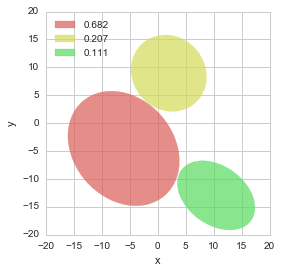

In [47]:
fig,ax = plt.subplots(figsize=(5,4))
plot_gmm_ellipses(gmm,ax=ax)

## 5.2 Goodness-of-fit statistics

In [48]:
gof_df(gmm_pdf_result, kde_result)

,R_square,K_S,Chi_square,MSE,RMSE / Max,RMSE / Mean
0,0.981,0.015,0.048,2.074108e-09,0.035,0.152


In [49]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, mixed_model_pdf)# passing a function as an argument

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = mixed_model_pdf(points)
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x',ylabel='y')
fig_gmm = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,pdf_Z,xlabel='x',ylabel='y')
fig = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,residual_Z,xlabel='x',ylabel='y')
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAUEAAAFBCAYAAADpDh0xAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXm0LVdZL/qb1a1+73NOQgIhEBoBSUgfn00kBEmukHuf
IBIwCF4BRZDYEC4XogMJOhyBK29gAxEeDC8YRUMPI8aLRiB5YhSCBgYoyAAJ6U9Ozm5WV+2c749a
31yzalW7Vq291zq7fhln5Jy9a1XNqlX1q6/5fd/HhBACNWrUqHFAoe33AmrUqFFjP1GTYI0aNQ40
ahKsUaPGgUZNgjVq1DjQqEmwRo0aBxo1CdaoUeNAoybBGjVqHGjUJFijRo0DjZoEa9SocaBRk2CN
GjUONGoSrFGjxoFGTYI1atQ40KhJsEaNGgcaNQnWqFHjQKMmwRo1ahxo1CRYo0aNA42aBGvUqHGg
UZNgjRo1DjRqEqxRo8aBRk2CNWrUONCoSbBGjRoHGjUJ1qhR40CjJsEaNWocaNQkWKNGjQONmgRr
1KhxoFGTYI0ZCCHAOYcQYr+XUqPG0mHs9wJqrBY45/B9H7ZtgzEmf95ut6Hr+j6urEaN5aAmwRoS
4/EY/X4fzWYTmqZBCIHxeIwgCMA5h6ZpMAxD/r8mxRonAmoSrAEhBIIggOd5CIIAjuNI0uOcA4C0
Cn3fhxACjuNA0zToul6TYo21BhN14OdAg9xfzjkcx8FoNErcjjEGXdflH02bhpPpFqpJscY6oibB
Awzf9xEEAQDAcRwMh0MAgK7raLVaCIIAtm0nJkhqUqxxoqAmwQMIIUSEAEejERzHkb9vtVowDCMS
E2y329Jtpj8qiBQpZqiSouu6cF0XrVYLjUajJsUaK4U6JnjAwDmH53mS0AaDATjn0HUdjUYj0x0m
yw6YymhUUvR9H77vA5hagbquS8uQyLeOKdZYJdQkeECgWnFEQkR4jUYD7XZbElgRqO4w7T9OikS4
BPq7rutgjGWSomVZEYlOjRrLQk2CBwCu68L3fSl7GQ6H8DwPjDF0Oh1YlrXwMbJIUbU8yY1WLcU8
UtR1HaZp1qRYYymoSfAERxAE2NnZge/76PV6GA6H4JzDMAx0u91I7I5QRZg4Toqu68KyLEmGnPOI
pZhFip7nwbZteJ4HXdfRbrdrUqxRGWoSPEERd38BoN/vAwgTH81msxCJ0DZCiIVJh2J/8fUVJUXX
dWXSxbbt2lKsUQlqEjwBoWr/yC0FQkLrdrswTXOfVxiuxTCMUqRI29Hn45ZiTYo15kFNgicYKEsL
hImI4XAoiWNjYyMzA7ufpFGEFOnnw+GwkPtMSZaaFGtkoSbBEwRZ2j8qf1snEkgiRRJz0/molmJc
uM0Yi2xDiRZVz1hLcmoANQmeEFC1f5xzDAYDBEEATdPQ7XYxHo+lJVUEFP9bJR09EbimaYnC7biA
O6maRe2QY1mWbBRBZLtOL4ka1aEmwTWHav25riutJdL+McZW5uGuklTz3Oc0UlShWookBq9J8eCh
JsE1heu6GI/H0rUbDodwXRcA0Ol00Gg09nmFU+wFmWSRIr0oVFJU3WjVUqxJ8eChJsE1BDU2GI1G
aDabUvun6zq63W5qrCvPEjuRHnKVFBuNhhRuEyEKIeRLA0h3n2tSPPFRk+AaIV51AQC2bQMAms0m
Wq1W4oNZP6yQBMYYQxAEME0TmqaVjikSKdL2zWYTzWZTZqhrrB9qElwTxLV/RH4A0O12Kyl9S4Iq
lj4RoLb5Mk1Taibjdc95pEhkqOu6TDrR70zTrElxjVCT4BqA6m+BMBEyGAzkw9xsNisnQCHECUN6
RUGWYhFSVJNNFIaIS3KAKXGSHKcmxdVETYIrjLj2bzweSwvQsiy4rlvqwSpDbKsmkdlrqKRIL4Uk
8bbrutIiVIXbKilS7DE+n6UmxdVATYIrirj2bzgcyk4w3W5XBvarlp3UmAWRmkqKRH7UmUftpRjv
uk2fJwJVSZESOPHu3DX2DjUJriBU608tfbMsC+12G5qmRfr05aEmt2qhXk/qlB23FLNIkciOwhyO
46DRaETE27WluHeoSXCF4Ps++v0+NE2TXZ6p9K3dbqPRaMgHY54HZJ3d21Vee5KlmNV1WyVF9bxU
S5G2qUlx+ahJcEVAN79t2zBNE47jIAiChbV/82DVCWfVUaTrtkqKAOTf45ZiTYrLR02C+4ykvn/k
6qqlb4ug7OeDIEC/3498bpWJcdVRtut2lvvs+35NihWjJsF9RFz7Nx6P5e/ytH/LvOHVtlUEak0V
79RSozzSum4DSLQUk9qG0bZEivRvwzBk3Lj+foqhJsF9gqr9U6e+AWHWcBni5yxrjvSHAOTsEZr1
4ft+JLtJiGvg1uGhW1WLNt51O2toVRIpcs5h27YclapailQdsw7fz36gJsE9Rlz7Z9u2tACbzSZs
216a9i/t8+rkOWAal+KcS1eMsqBZAuK0YeyriEUJQe1wXfV+yk7yixNckqVYk2I6ahLcQ8Td38Fg
IK2sbrcLwzAi5XBZKHMDp21LjUrpIel0OtIaTEKegDgpA0qWSY35UYQUCb7vYzQaZbrP8Ul+JOI+
qKRYk+AeQbX+1NI30zTR6XSk1gzYG5eN1qBOnitLrGVkIXRMeqAP6gNXBZJI0fM8+TLLG1oVT7Q4
jiNF22qi5aCgJsElg7R/uq7DsqxI6dtea//IelPdX7X7jLqvsmupYu5wjflALyMAsilE2Ul+AOTM
593dXXDO0ev1DsQogpoElwiqG6V27rZtR9reUyA8jiLENi9hxt1fNQFTJRGppMgYg+M4sjlB0oN5
UDPPVcUWVcwzyU+9/vQCI0tedZ9PREuxJsElIKnvH8kYLMtCp9PZ04ecjjUejyGEgGEY6HQ6e34j
q11a5pkRskpYpzhnWVIkkFhfneRHnsSJRIo1CVYMNfkBIKL9K9L2viw55j2MFC+iv2c1X1U/s+yH
PP5g5rWuis8dXhWsisVaxqIsQorAtGFvkpV+IpFiTYIVggLNdFPFtX9F535U9aCr7i8A2YBhFVGk
nx/9fDgcrryluE6IkyI17IjHFglFSTEep1xV1CRYAeLaPzXx0Gg0ZPatCKraTs3+kuYvLQZZ5Dh7
bYHF5Ticc2lVx1tXrXOSZRkxwSrAGJMv7bKhC5UU6YXVbrdxxx134JRTTsG55567X6eViJoEF0Rc
+zccDuVgnk6nI5shlM3iLrKt4ziR0Zs0ja4Ilvkwzkukqjus6zqazWbpiopF17DqWCaZlgldAJix
0IkUv/SlL+Hss89OJUEhBK677jp861vfgmVZ+L3f+z087nGPk7//3Oc+hxtuuAGGYeBnfuZncOWV
V+Z+5vrrr8eTnvQkvOQlLwEAfPCDH8Qtt9wCxhguueQSvO51r6tJcBHEtX809Y10d3vtpqVlf9Wp
avuBqh/MNDkOfR9ZmedVtbxWCUKIzHu3zCgCIHw2Pv/5z2M8HqPZbKbu99Zbb4Xruvirv/orfPWr
X8X111+PG264Qe7j7W9/Oz7xiU+g0WjgqquuwnOe8xx85StfSfzM8ePH8aY3vQl33303nvSkJwEA
7rnnHtx888342Mc+BgC46qqrcPnll9ckOA88z4Nt29LiUEvfWq0Wms3mzENW1AIp09ZePQbFILPa
bxXdL9WerguSSDHroQSQWnJWFCeqRTkP0kiRXkr/8R//gTe+8Y0AgFtuuQWf+cxn8OxnPxsvfOEL
I9f+K1/5Cp75zGcCAM4991x8/etfl7/7zne+gzPOOAPdbhcAcNFFF+FLX/oS7rrrrshnvvGNbwAA
RqMRfvVXfxW333673MdjHvMYfOADH5D/9n0/LAddxkU5kUGxqcFgANd10e/3MR6PoWkaer1eYua1
6oxvfFvHcbC

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARsAAADZCAYAAAAQepQqAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnXtUVFea9p+6WKCAQmxRIglEBCWCFyCZTOIwrlGjTDpt
Z2JiIIasNEZ0jVlpLxU0MkFntCXdam5KVtLpbo3xQkKbYTqfX0+HxCk/NSuGmoAaQYwSUFQgIG0V
IpfifH9Un/JUcW51OaeqqPe3Vq1lndveBcXju9+99/NqGIZhQBAEoTBaf3eAIIjQgMSGIAhVILEh
CEIVSGwIglAFEhuCIFSBxIYgCFXQ+7sDBEF4B8Mw2LRpE86fPw+DwYCtW7finnvucZz/8ssvUVZW
Br1ejyeffBJPPfWU5D3btm3DpEmTsGTJEgDA/v378emnn0Kr1eKFF15ATk4OACA7OxuJiYkAgFmz
ZmH16tWiHSUIIoj5y1/+wqxfv55hGIapqalhVq5c6TjX39/PzJ8/n7FYLExfXx/z5JNPMh0dHYL3
dHR0MMuWLWPmz5/PHDp0iGEYhuns7GR++tOfMjabjbFarcw//uM/MgzDME1NTcyKFStk95OGUQQR
5JjNZvzDP/wDAGDGjBk4e/as49zFixeRkJCAyMhIjBgxAllZWTh16tSQe7777jsAwK1bt/DSSy/h
Zz/7meMZMTExqKyshFarRXt7O8LCwgAAZ8+eRWtrK/Lz81FYWIjGxkbRfvplGDU4OIji4mI0NjZC
q9Vi8+bNMBgMWL9+PbRaLZKTk1FSUuKPrhFE0GG1WhEVFeV4r9frMTg4CK1WO+TcqFGjYLFY0N3d
7XRcp9NhcHAQ8fHxiI+Px7Fjx5za0Gq12L9/P9555x0899xzAIDY2FgUFhZiwYIFMJvNMBqNqKio
EOynX8Tmyy+/hEajwcGDB3Hq1Cns3LkTDMNgzZo1yMrKQklJCaqqqjBv3jzBZ5jNZhV7TBDuk5mZ
Keu6b2u+wKAtWvC8wWBAenq64PnIyEh0d3c73rNCw56zWq2Oc93d3RgzZozoPUI8++yzWLJkCZYt
W4ZTp05h+vTp0Ol0AOyftb29XfR+v4jNvHnz8E//9E8AgKtXr2LMmDE4efIksrKyANiTTidPnhQV
GwD4eItdfS1WC6Iio0Sv9RXUFrUlp62ni7Nl3zdoi8b4e7cJnm9t3iB6f0ZGBo4ePYqFCxeipqYG
KSkpjnNJSUloamrCzZs3ER4ejurqahQUFACA4D2uNDY2YufOnXjnnXeg0+kQFhYGrVaLXbt2ITo6
GsuWLUN9fT3i4uJE++m32SitVov169ejqqoKb731Fk6cOOE4FxERAYvF4q+uEURQMX/+fJw4cQLP
PPMMAPtM0meffYaenh489dRT2LBhA37xi1+AYRgsXrwYsbGxvPcIcd9992Hq1KlYsmQJNBoNsrOz
kZWVhZSUFBiNRphMJuj1etFnAICGYfy767ujowOLFy/GrVu38PXXXwMAvvjiC3z11VcoLi4WvM9s
NuN36/+PWt0kCLcoKH1M9jDKbDZLRjZynxXI+CWyqaysRGtrK5YvX+4IydLS0nDq1Ck8+OCDOHbs
GB566CHJ57AhayiE5dQWtRXs+EVsHn30UWzYsAFLly7FwMAAiouLMWnSJBQXF6O/vx9JSUlYuHCh
P7pGEIRC+EVsRo4ciTfffHPI8X379vmhNwRBqAEt6iMIQhVIbAiCUAUSG4IgVIHEhiAIVSCxIQhC
FUhsCIJQBRIbgiBUgcSGIAhVIFtQgghyGBVsQffs2YMjR444NmL+67/+K3p7e2E0GtHR0YHIyEiU
lpYiJiZGsJ8U2RBEkFNVVYW+vj4cOnQIa9euddp9PTAwgNLSUuzZswf79u1DeXk5Ojs7Be/p7OzE
iy++iKNHjzqecfnyZXz22Wf4+OOPUV5ejuPHj6OhoQEHDx5ESkoK9u/fj0WLFqGsrEy0nyQ2BBHk
KG0LGhcXhw8++MDx3mazISwsDGazGdnZdt+e7OxsfPXVV6L9JLEhiCBHyBaU75wcW9Dp06c7PV+v
1yM62u4k+Prrr+P+++9HQkICrFYrIiMjAdg9qLiOgHxQzoYgAoCvexIEzyVK3KuGLWhfXx82bNiA
qKgohz849xmu4sUHRTYEEeRkZGTAZDIBgKgtaF9fH6qrqzFz5kzMmjVL8B4+Vq5cidTUVGzatAka
jWZIuyaTyWHrKwRFNgQR5ChtC1pVVYXq6mr09/fDZDJBo9Fg7dq1yM3NRVFREfLy8mAwGLBjxw7R
fvrdFtRTzGYzGZ5TWwHb1tPF2W7Zgv4w7oDg+cT2vGFhC0rDKIIgVIHEhiAIVaCcDeE1DZ09Q46l
3DXSDz0hAhnVxWZgYACvvvoqWlpa0N/fjxUrVmDy5MlUejfA4RMUlqT0e5zeXzxz2el6Eh4C8IPY
/Nd//RdiYmLw61//Gjdv3sSiRYswdepUt0rvEsohJCqugiIG91qu8JDohDaqi01OTo6jTIvNZoNO
p8O5c+fcLr1L8CMWgYhhs2mg67Pf646wSME+ixUdEpzQRXWxGTnS/mWzWq14+eWXsXr1arz++uuO
81R61z34xMUTsbBYLJIrQL0hKf0eh+DEGRRrhghg/JIgvnbtGlatWoWlS5fisccew29+8xvHue7u
bowePVrWcyxWC++/lcbfbV3p0Ti9j0sa63yPh2KttMjHJkbj2sUOe1sh9Psi7KguNj/++CMKCgrw
2muvOUrspqam4ptvvsEDDzwgu/QuEHrld9koRqfz7VAHUD6yYWnTdeFKjw2p4yIVbwsYvt+NYER1
sXnvvfdw8+ZNlJWVYffu3dBoNNi4cSO2bNlCpXdFYIXG1yKjNknp96Ch5gd/d4PwA6qLzcaNG7Fx
48Yhx6n0Lj/cnEywCw0XShb7DjWc+ljjrBEjRmDFihWYM2cOAPuETmJiIgBg1qxZWL16tWA/aVFf
AHOlR6PIkMkdzlhuiJ5PjxK2gRQiLmks2n7o8rRLhAtc173a2lps27bN4ZrHOvUdPnwYYWFhyM3N
xdy5c2E2m3nv6ezsRFFREZqamjBp0iQA9tTHvn378Omnn+L27dvIzc3FI488gmvXrmHatGl49913
ZfWTxCZAUWPYxBWSAZsNesvAkGuSkieIP+PCdce/PREewnvkOvUBcDj11dTUiDr1HTt2zPGM06dP
IzMzE3q9HpGRkUhMTMT58+fR3NyM1tZW5OfnY+TIkVi/fj3uu+8+wX6S2AQgrNC4zjJ5ilB0whUS
TxPE3GewwkOioy5CTn1ardYjp774+HgnsRF6RmxsLAoLC7FgwQKYzWYYjUZUVFQI9pPEJoBwjWa8
mYp2FRipCMUXJCVPwMUL13HGcoMEx00uWa8InkuUuFdppz6+Z4wePRpJSUnQ6XQAgMzMTLS3t4v2
k8QmQPB22OQPceGDBMczumwPe3xvRkYGjh49ioULF4o69YWHh6O6uhoFBQUAIHiPK9OnT8ebb76J
vr4+9Pb24tKlS0hOTsbbb7+N6OhoLFu2DPX19YiLixPtJ4lNAOCN0HBFxhcCU9st/r8Ty4yIcYLn
WMEh1EFpp76f/OQneO6555CXlweGYbBmzRoYDAYsX74cRqMRJpMJer1e9BkAOfW5jS/bkprWFsqj
+EJgXEWF3aeWkhAreW9DU5vTez7huSiSv7FYLGj7oUuVqe9gceo7bDgueP5f+mYPC6c+imz8hKfR
DCs07oqMq7i4ioo7f5Tcexua2lDb3T5EcKSim6T0e9Bw5jKttQkhSGz8gCdC44nISAmML0hJiBUU
HILgQmKjIp6uBnZXaLgio4TAuMIKjitJyRNw5sJ1ShQTAEhsVMOTaOZ7Wy/0lgHFRaamvxU2vQ26
/luy75k5Yrz

In [50]:
def f(V,theta):
    return (mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V

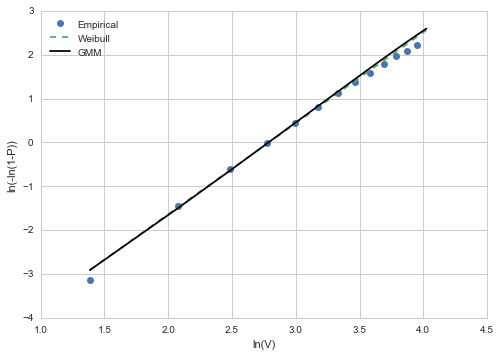

In [51]:
x = linspace(0, max_speed, 15)

# 1. Plot v-p points, empirical distribution
ecdf = sm.distributions.ECDF(df.speed)
y = ecdf(x)
plot(log(x), log(-log(1-y)),'o', label = 'Empirical')

# 2. Weibull distribution
weibull_params = sp.stats.exponweib.fit(df.speed, floc=0, f0=1)
y_cdf_weibull = sp.stats.exponweib.cdf(x, *weibull_params)
plot(log(x), log(-log(1-y_cdf_weibull)),'--', label = 'Weibull')

# 3. GMM distribution
y_ = [integrate.nquad(f, [[0, x_val],[0, 2*pi]]) for x_val in x]
y = array(zip(*y_)[0])
plot(log(x), log(-log(1-y)),'-', color='black', label = 'GMM')

plt_configure(xlabel='ln(V)',ylabel='ln(-ln(1-P))',legend={'loc':'best'})

Direction Distribution Comparison


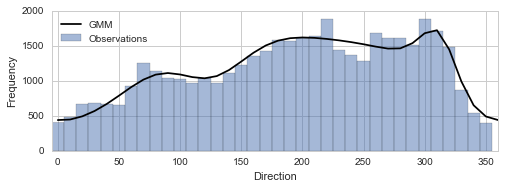

In [52]:
# Calculate Angle Distribution
x = linspace(0,2*pi, num=36+1)
y_ =[integrate.nquad(f, [[0, inf],[x_-pi/36, x_+pi/36]]) for x_ in x]

# 1. integrate.nquad returns 2 vaule, result, abserr. Need to abstract the first to plot
# 2. * length of data size, to adjust the plot space
y = array(zip(*y_)[0])*len(df['dir']) 

df['dir'].hist(bins=DIR_BIN, alpha=0.5, label='Observations')
plot(x/pi*180, y,'-', color='black', label='GMM')
title='Direction Distribution Comparison'
plt_configure(xlabel='Direction',ylabel='Frequency', legend={'loc': 'best'} ,tight='xtight',figsize = (8,2.5))
dir_fig = plt.gcf()
print title

Speed Distribution Comparison


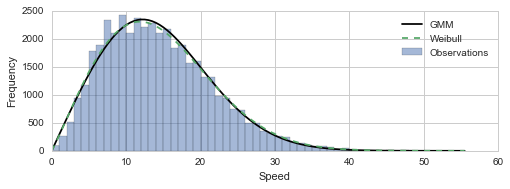

In [53]:
# Calculate Speed Distribution
# 1. GMM Model
x = arange(0, max_speed, 0.5)
y_ =[integrate.nquad(f, [[x_-0.01, x_+0.01],[0, 2*pi]]) for x_ in x]
y = array(zip(*y_)[0])*len(df.speed)/0.02
plot(x, y,'-', color='black', label='GMM')

# 2. Observation
df['speed'].hist(bins=arange(0, df.speed.max()), alpha=0.5, label='Observations')

# 3. Weibull
y_weibul = sp.stats.exponweib.pdf(x, *weibull_params)* len(df.speed)
plot(x, y_weibul, '--', label='Weibull')   
title='Speed Distribution Comparison'
plt_configure(xlabel='Speed',ylabel='Frequency',legend=True, figsize=(8, 2.5))
plt.gca().set_ylim(bottom = 0)
plt.locator_params(axis='y', nbins=5)
print title

In [54]:
incre = SECTOR_LENGTH 
density_collection =[]
for angle in arange(0, 360, incre):
    angle_radian, incre_radian = radians(angle), radians(incre)  
    start_angle, end_angle = angle-incre/2, angle+incre/2
    sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)
    data_size = len(sub_df.speed)    
        
    bins = arange(0, sub_df.speed.max()+1)

    density_, division = np.histogram(sub_df['speed'],bins=bins)
    density = density_/len(df)
    density_expected_ =[integrate.nquad(f, [[x_, x_+1],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
                        for x_ in bins[:-1]]
    density_expected = array(zip(*density_expected_ )[0])
    fig = plt.figure(figsize=(1.5,1.5))
    plot(bins[1:], density)
    plot(bins[1:], density_expected)
    
    curves = {'angle': angle, 'data_size': data_size, 
          'density': density, 'density_expected': density_expected}
    density_collection.append(curves)
    title = '%s (%s - %s) Degree' % (angle, start_angle, end_angle)
    plt_configure(title = title)
align_figures()

/Users/cqcn1991/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAJgAAAB6CAYAAABDTpqoAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnXlA1NX2wD8zwzLAsCqI7MqiooKKGppbbmlaPlNB3Cpp
0WfmKy3jWebzldpi9jLt2cvqpf5yyUzl1XPHlUxQfKmACwKKIPu+zPb9/TExggzMDA6b8flHZ+Yu
5w5n7vfec+45VyQIgkA77TQR4pYWoJ2Hm3YFa6dJaVewdpqUdgVrp0lpV7B2mpR2BWunSTFrzs5i
YmL4+OOPUSgUdOvWjffeew8bG5tGlwNYu3YtoaGhPProo3U+W7NmDQcOHMDBwQGALl268PHHHz9Q
f/Vx9epVwsPD8fHx0b63bt26Wq8B8vPzWbp0KXfu3EEsFrNy5Ur69u1LeXk5ixYtYsOGDVhYWNRp
f/bs2dy5cwc7OzsEQUCpVDJgwACWLFlitKzNitBM5OXlCYMGDRLS09MFQRCEDz/8UFixYkWjywmC
ICQkJAjz58+vt8/w8HDhwoULJpFLH9u3bxfefvttveUWLVokbNq0SRAEQUhMTBSGDh0qVFZWCoIg
CD/++KOwZs0anfVmzZolHDx4UPtaqVQK77zzjvDSSy8ZLWtz0myPyNOnTxMUFISnpycAERER7N+/
v9HlANavX094eLjOz+RyOVeuXOGrr75i0qRJvPLKK2RmZj5Qfw1x4cIFUlJSmDZtGmFhYRw6dKhO
GZVKRUxMDNOmTQOge/fu+Pj4cPLkSQDGjx/P/v37yc/P19mHUMMmLpFIiIqKIi4ujps3bwJw9OhR
wsLCePrpp5kxYwYJCQkAVFZWsnTpUh5//HHCwsKIiooiKioKgJEjR/Lqq68yYcIEDh8+zN27d3n5
5ZeZMmUKkyZN4osvvqg1xpkzZ/L0008zdepUYmJi9H4vzfaIzMzMxNXVVfva1dWVsrIyysrKak3x
hpYrKSkhPj6ef/7znzr7y87OZtCgQSxevBhvb282b97Mn//8Z/bs2dMoufRhbW3NxIkTmT59Ojdu
3GDOnDm4u7sTGBioLVNQUIAgCDg6Omrf69SpE1lZWQBYWFgQEhLC8ePHmTx5st4+LS0t8fHx4erV
q4jFYtatW8fWrVuxt7fn+vXrPPvssxw+fJgNGzagUqk4cOAApaWlzJw5s5ZcAQEBrFu3DoBnnnmG
5557jhEjRiCXy3nhhRfw8vJi8ODBREVF8dVXX+Hm5kZ2djZhYWFs37691vd3P3oVTBAEVqxYQXJy
MhYWFrz33nvaXztofjUbN27EzMyMKVOmMG3aNJ11BEGgtLSUGTNmIBaL8fX1BTS/xK+++oro6Ggk
Egk+Pj46/7ASiaTW67S0NFxcXDAz0z0EDw8PNm3apH0dGRnJxo0bycjIwN3dvdb4dHF/f/pYvny5
9v++vr6MHz+eo0eP1vpDqtVqnXXF4nsPEi8vL+2MZAgikQipVMrp06fJzc3l2Wef1Y7JzMyM1NRU
Tpw4oZ2xZDIZkydPJjk5WdtG//79AaioqODcuXMUFxfzySefaN9LTEzEysqKnJwcFixYoG1fLBaT
nJz8YAp2+PBh5HI527dv5+LFi6xevZqNGzcCoFQqWbNmDT/88AOWlpZEREQwatQo4uPj69QZN24c
3377Lf/4xz/o378/S5YswcrKCoVCwZYtWzh8+DBlZWWMHTuWfv36afvPysrCzs4OqVRaSy6xWIxK
pdK+/vTTTzl69CgikYiRI0cyduxYkpKSmDRpkraMIAh1FLJz585cvHhRb3/3t79w4ULtZ2q1mi++
+II5c+ZgbW1db18dOnQANLOvra0tAHfv3q31B1KpVDoX+bqoqKggJSWFgIAAbt26xaBBg2ptYrKy
snBxcUEikdT6IdVUaEArc/X3uWPHDq0MBQUFSKVSfvnlF/z8/NixY4e2XnZ2tnZM9aF3DRYfH8/Q
oUMBCA4O5tKlS9rPbty4gbe3NzKZDHNzc/r378+vv/5ap87ly5cZMmQI+fn5uLi4AJo1kqurK1ZW
Vri7u1NWVkZ5eTlWVlb873//Iz09XTvYUaNG1ZHL09OTvLw85HI5AK+88go//vgje/bsYeHChYjF
YlatWkVGRgYA27Zto3v37nTq1KlWO0OGDDGov/vbr/UlisUcPXqUnTt3ApCRkcHBgwcZO3ZsrXIS
iYThw4ezfft2AJKSkkhJSWHgwIHaMrdv36Zr1671/0F+p7KyktWrVzN8+HA6d+5MaGgop0+fJiUl
BYDjx48zadIk5HI5I0aM4IcffkAQBCoqKoiOjkYkEtVpUyaTERwczObNmwEoLi4mIiKCI0eOEBwc
TGpqKnFxcQAkJiby+OOPk52d3aCcemew0tJS7a8NNNOuWq1GLBbX+cza2pqSkhLKyspqvS+RSLC3
t8fW1paFCxeiVCqRyWR069YN0KwlBg0ahIODAy+++CJdunTRlvP09OSDDz6oI5etrS39+/fn7Nmz
WmWuib+/P2+99Rbz5s1DrVbj6uqq/XVfunSJt99+mz179uDk5MSqVav09qePtWvXsnz5cnbv3o0g
CCxbtkyrKC+++CIRERE89thjvPPOOyxbtox9+/YhEon48MMPkclkgOZHl5CQwKpVq3T28cEHH/D5
558jEolQqVQMHjyYt956CwA/Pz9WrlzJa6+9pv3OP//8c6RSKS+99BIrV67kqaeeQiaT0aFDB6ys
rADqKNratWtZuXIlTz75JEqlkieffJKJEycCmk3VBx98QFVVFYIg8OGHH9K5c+cGvxeRUN8i5HfW
rFlDnz59GDduHAAjRozQ7h6Sk5NZu3atdqexevVqQkJCuHDhAsHBwXXqDB8+nOPHjwNw5MgRYmNj
GTx4MP/+97/58ssvEQSByMhI3njjDXr37l2vTPHx8YDG9rR3715ef/31BgfZVjhx4gQZGRlERESY
tN3Y2FisrKzo06cPgiDwySefEBQUVGumDgkJMWmf1eidwfr168exY8cYN24cCQkJBAQEaD/z9fUl
LS2N4uJipFIpcXFxREZGAuisExgYyLlz5xgwYAAnTpwgNDRUu94xNzcHNDNTSUmJXsFDQkIICQkh
PT2diooKhgwZYtTA4+PjdX6p5fIKdl3+Dz9fO4ZaqL0ol5pZsvjRFwl2DWywjcbIUFZWxsaNG9mw
YUOd9V9jxlETOzs7li9fzv79+1EoFISGhrJ48WLtRqb6B9sU6FWwMWPGcPr0aaZPnw5oZqno6Ggq
KiqYNm0aUVFRzJ07F0EQmDp1Ki4uLjrrACxdupS3334bhUKBr68v48aNQyQSERsbS1hYGGKxmJCQ
EAYPHmzwAJYuXdqYceskrfA27x1fT2FlMZ1kzjzXdxq+Tt7cyE8jOTeF6OTDrDmxgQWPPMMQ74H6
GzQCGxsb7drH1Pj7+/Pdd981Sdv60PuIbI086Myhqw2FSsGbB1dzqziTsF4Tear7WCwk5rXqXMm+
xgenPqdcUcGzfafRqcTeZDNYW2+jPtqd3b+z81I0t4ozGes3jKk9J9RRLoBAF3/+NvI1HKR2fHNh
FwlFSS0gaduiXcGA5Nwb7Es+RCeZM7OCGragezt48PdRS7CxsOZo7i/cLc1pJinbJn94BatUVrHh
7L9BgAUD5yA117/A7iRzZm7fcBSCko2/bqmzGWjnHnoVTBAE3nnnHaZPn86cOXO4detWrc+PHj3K
1KlTmT59Ort27WqwTnp6OjNmzGDWrFn87W9/AzTGxtmzZzNnzhxmz55NUFAQp06dMvU462Xnb/vJ
Ks3hye6j6e7sZ3C9Id4DCLDxJjHnGj9fPdaEErZx9B23OHjwoPDmm28KglD3eIxCoRDGjBkjlJSU
CHK5XJgyZYq

In [55]:
true_R_square(density_collection)

0.89965769249285821

## 5.3 Sectoral Comaprison

In [56]:
# Calculate Speed Distribution
def model_data_comparison(df, original_incre = 10, incre = 10):
    start, end = -original_incre/2 + incre/2, 360
    max_diff_array = []
    curve_collection = []
    max_speed = df.speed.max()
    
    # Find a max count for plotting histogram
    max_count = max_count_for_angles(df, start, end, incre)
    plot_range = [0, max_speed, 0, max_count*1.05]
    
    for angle in arange(start, end, incre):
        angle_radian, incre_radian = radians(angle), radians(incre)  
        start_angle, end_angle = angle-incre/2, angle+incre/2
        
        # Select data from observation
        sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)
        data_size = len(sub_df.speed)
        direction_prob = integrate.nquad(f, [[0, inf],
                                             [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
        weibull_params = sp.stats.exponweib.fit(sub_df.speed, floc=0, f0=1)
        
        fig = plt.figure(figsize=(13,1.6))
        x = linspace(0, sub_max_speed, 20)
        # 1. Frequency Comparison
        ax1 = fig.add_subplot(1,3,1)        
        # 1.1. Data Histogram
        sub_df['speed'].hist(bins=arange(0, sub_df.speed.max()), alpha=0.5, label='Data')             
        # 1.2. Model Distribution
        y_gmm_ =[integrate.nquad(f, [[x_-0.01, x_+0.01], 
                                     [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
                                 for x_ in x]
        y_gmm = array(zip(*y_gmm_)[0])/direction_prob[0]/0.02
        plot(x, y_gmm*data_size,'-', color='black', label='GMM')
        # 1.3 Weibull Distribution
        y_weibull = sp.stats.exponweib.pdf(x, *weibull_params)
        plot(x, y_weibull*data_size, '--', color='black',label='Weibull')   
        plt_configure(xlabel = "V", ylabel='Frequency')
        if angle == start: plt.legend() 
        plt.axis(plot_range)
        
        # 2. CDF Comaprison
        ax2 = fig.add_subplot(1,3,2)
        # 2.1. Empirical distribution
        ecdf = sm.distributions.ECDF(sub_df.speed)
        y_ecdf = ecdf(x)
        # 2.2. Model
        y_ =[integrate.nquad(f, [[0, x_val],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
             for x_val in x]
        y_cdf_gmm = array(zip(*y_)[0])/direction_prob[0]
        # 2.3 Weibull
        y_cdf_weibull = sp.stats.exponweib.cdf(x, *weibull_params)
        
        plot(x, y_ecdf,'o', alpha=0.8, label='Data')
        plot(x, y_cdf_gmm,'-', color='black',label='GMM')
        plot(x, y_cdf_weibull,'--', color='black',label='Weibull')
        
        plt.gca().set_xlim(right = max_speed)
        plt_configure(xlabel = "V", ylabel='P')
        if angle == start: plt.legend() 
        
        # 3. Weibull Comparison
        ax3 = fig.add_subplot(1,3,3)
        plot(log(x), log(-log(1-y_ecdf)),'o', alpha=0.8, label='Data')
        plot(log(x), log(-log(1-y_cdf_gmm)),'-', color='black', label='GMM')
        plot(log(x), log(-log(1-y_cdf_weibull)),'--',color='black',label='Weibull')
        plt_configure(xlabel="ln(V)", ylabel="ln(-ln(1-P)")
        plt.gca().set_xlim(right = log(max_speed+1))
        if angle == start: plt.legend(loc='best') 
        
        title = '%s (%s - %s) Degree' % (angle, start_angle, end_angle)
        plt.suptitle(title,y=1)      

        bins = arange(0, sub_df.speed.max()+1)
        density, _ = np.histogram(sub_df['speed'],bins=bins, normed=True)
        density_expected_ =[integrate.nquad(f, [[x_, x_+1],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
                    for x_ in bins[:-1]]
        density_expected_gmm = array(zip(*density_expected_ )[0])/direction_prob[0]
        R_square_gmm = sector_r_square(density, density_expected_gmm)
        
        density_expected_weibull = sp.stats.exponweib.cdf(bins[1:], *weibull_params) - sp.stats.exponweib.cdf(bins[:-1], *weibull_params) 
        R_square_weibull = sector_r_square(density, density_expected_weibull)

        diff = np.abs(y_ecdf - y_cdf_gmm)
        diff_weibull = abs(y_ecdf - y_cdf_weibull)
        max_diff_array.append([len(sub_df), angle, diff.max(), x[diff.argmax()], 
                               diff_weibull.max(), x[diff_weibull.argmax()], R_square_gmm, R_square_weibull])
        curves = {'angle': angle, 'data_size': data_size, 'weight': direction_prob[0], 
                  'x': x, 'gmm_pdf': y_gmm, 'gmm_cdf': y_cdf_gmm,
                  'weibull_pdf': y_weibull, 'weibull_cdf': y_cdf_weibull, 'ecdf': y_ecdf}
        curve_collection.append(curves)
        
        plt.show()
        print 'data size:', len(sub_df), 'weight', len(sub_df)/len(df)
        print 'GMM', 'Weibull'
        print 'R square', R_square_gmm,  R_square_weibull
        print 'max diff:', diff.max(), diff_weibull.max()
#         ', speed value:', x[diff.argmax()], 'y gmm', y_cdf_gmm[diff.argmax()]
    return max_diff_array, curve_collection

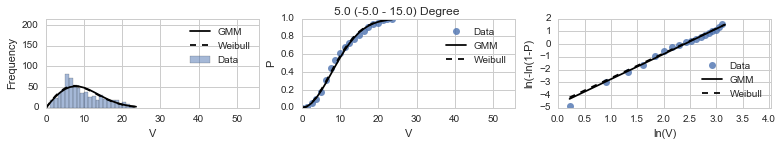

data size: 672 weight 0.0156800522668
GMM Weibull
R square 0.72651914991 0.754591701579
max diff: 0.0737932634263 0.0530574501974


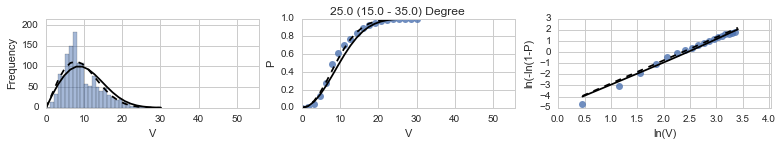

data size: 1348 weight 0.0314534381781
GMM Weibull
R square 0.75436376304 0.836446799157
max diff: 0.132309083065 0.061837205071


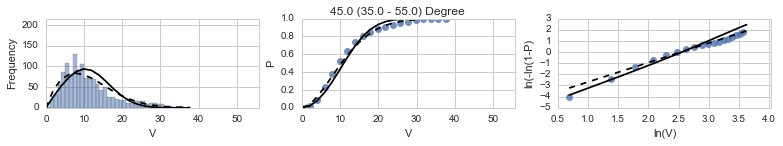

data size: 1339 weight 0.0312434374781
GMM Weibull
R square 0.789475935194 0.867752366355
max diff: 0.10059319552 0.0517627198566


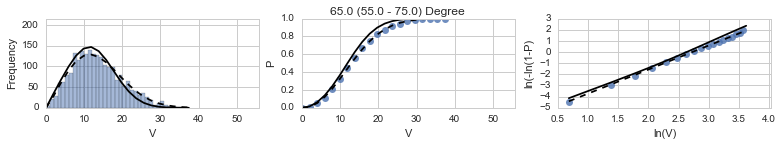

data size: 2182 weight 0.050913503045
GMM Weibull
R square 0.933015228289 0.973527707616
max diff: 0.076921264817 0.0107131407186


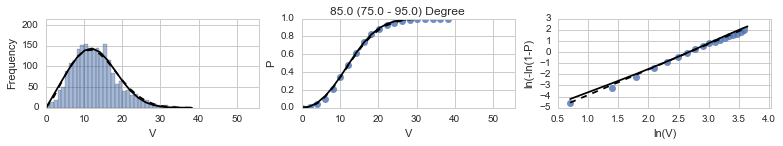

data size: 2186 weight 0.0510068366895
GMM Weibull
R square 0.961129184526 0.961029080346
max diff: 0.0292005194021 0.0308646254725


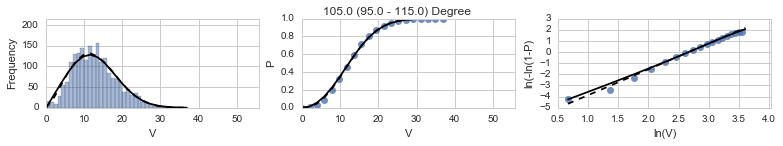

data size: 1994 weight 0.0465268217561
GMM Weibull
R square 0.935592827793 0.946698959594
max diff: 0.0385601484026 0.0258793146862


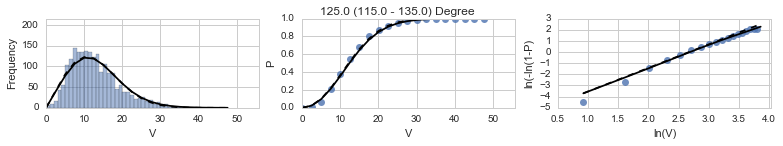

data size: 2009 weight 0.0468768229227
GMM Weibull
R square 0.943111174767 0.947284607275
max diff: 0.0429059663315 0.0361096564139


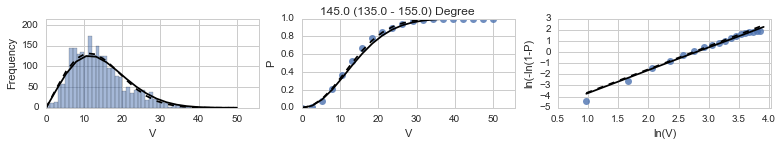

data size: 2354 weight 0.0549268497562
GMM Weibull
R square 0.921864668803 0.938210403714
max diff: 0.0644771506625 0.0302132629432


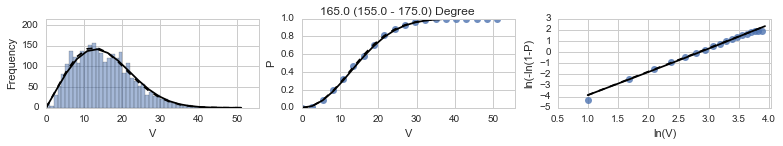

data size: 2786 weight 0.0650068833563
GMM Weibull
R square 0.962918667968 0.966798029904
max diff: 0.0242807147904 0.00990055960699


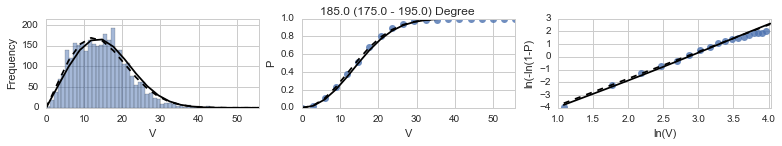

data size: 3167 weight 0.0738969129897
GMM Weibull
R square 0.957527408159 0.96286042991
max diff: 0.0393564595515 0.0224865886719


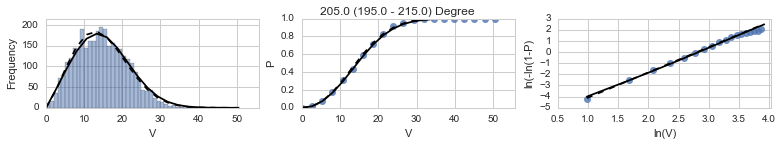

data size: 3267 weight 0.0762302541008
GMM Weibull
R square 0.978821617851 0.978366712155
max diff: 0.0232764541584 0.0166530990604


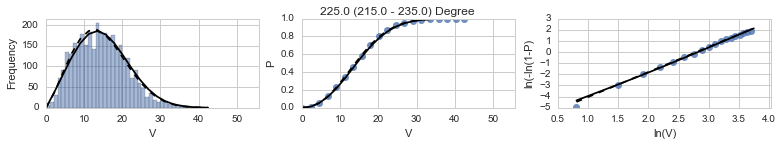

data size: 3333 weight 0.0777702592342
GMM Weibull
R square 0.96438599084 0.966325886987
max diff: 0.0211540928597 0.0115732128158


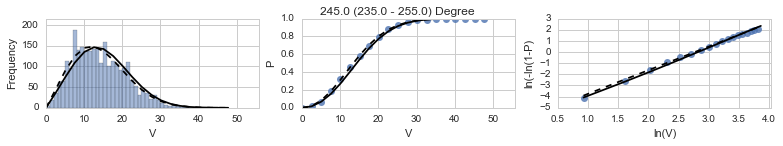

data size: 2665 weight 0.0621835406118
GMM Weibull
R square 0.914936356945 0.940019389316
max diff: 0.0569166652203 0.0145118485112


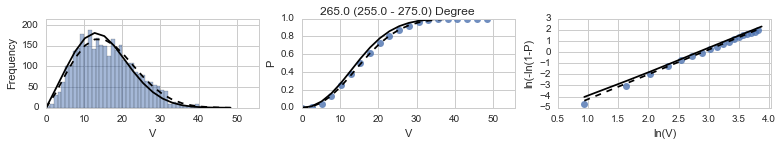

data size: 3307 weight 0.0771635905453
GMM Weibull
R square 0.941293073605 0.964950921771
max diff: 0.0659121327362 0.0158266146653


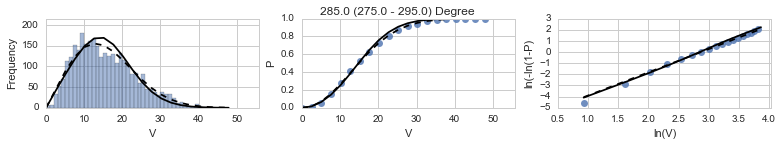

data size: 3132 weight 0.0730802436008
GMM Weibull
R square 0.915811684587 0.955588355459
max diff: 0.0403846705888 0.022312744698


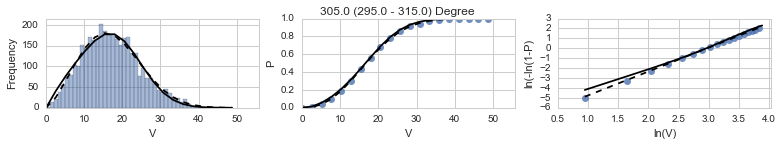

data size: 3596 weight 0.0839069463565
GMM Weibull
R square 0.970968403042 0.979833657484
max diff: 0.0232709344744 0.00956880545965


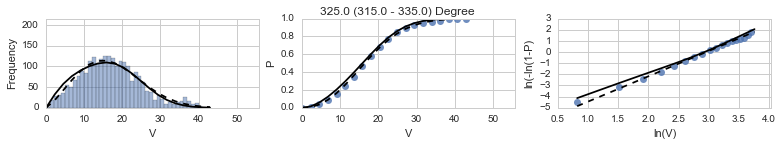

data size: 2358 weight 0.0550201834006
GMM Weibull
R square 0.923865311397 0.947480084608
max diff: 0.0568193672949 0.0191285835547


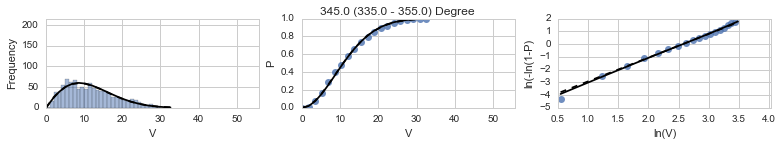

data size: 950 weight 0.0221667405558
GMM Weibull
R square 0.909209406272 0.910660450783
max diff: 0.0335640775175 0.0293627606411


In [57]:
if len(effective_column) == 16:
    rebinned_angle = 22.5
else: 
    rebinned_angle = 20
max_diff_array, curve_collection = model_data_comparison(df, SECTOR_LENGTH, rebinned_angle)

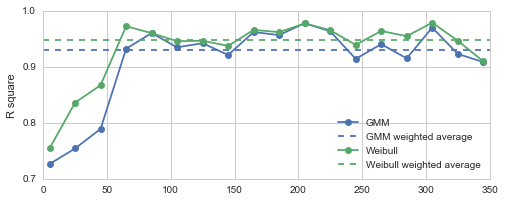

In [58]:
diff_df = pd.DataFrame(max_diff_array,columns=['datasize','direction', 'gmm', 'speed_gmm',
                                               'weibull', 'speed_weibull', 'r_square_gmm', 'r_square_weibull'])  

plot_sectoral_comparison(diff_df.r_square_gmm, diff_df.r_square_weibull, diff_df.direction, diff_df.datasize)
plt_configure(ylabel='R square')

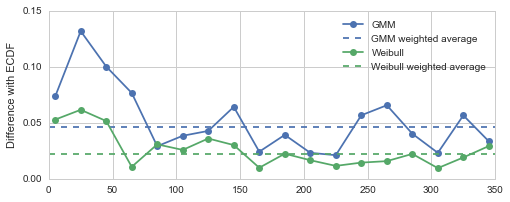

In [59]:
plot_sectoral_comparison(diff_df.gmm, diff_df.weibull, diff_df.direction, diff_df.datasize)
plt_configure(ylabel='Difference with ECDF')

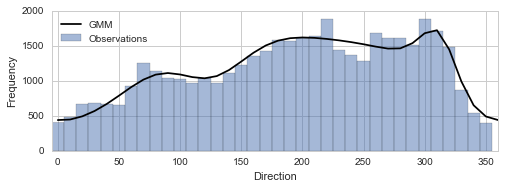

In [60]:
# Compare direction weight with previous figure
display(dir_fig)

### 5.3.1 Data Variability, by Bootstrap (Resampling)

In [61]:
FRACTION = 0.5 

In [62]:
max_diff_element = max(max_diff_array, key=lambda x: x[2])
angle =  max_diff_angle = max_diff_element[1]
incre = rebinned_angle

# Select data from observation
start_angle, end_angle = angle-incre/2, angle+incre/2
angle_radian, incre_radian = radians(angle), radians(incre)  
sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)
weibull_params = sp.stats.exponweib.fit(sub_df.speed, floc=0, f0=1)

25.0 (15.0 - 35.0) Degree Speed Distribution
0.148059011483 10.0 0.516629415816


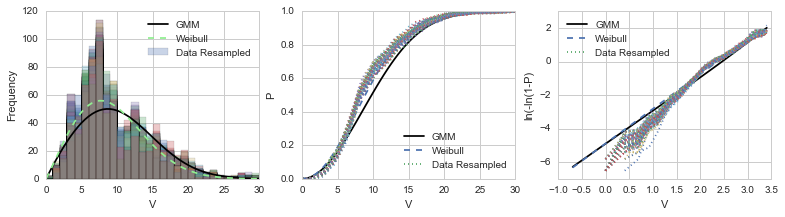

In [63]:
fig = plt.figure(figsize=(13,3))
ax1 = fig.add_subplot(1,3,1)   
ax2 = fig.add_subplot(1,3,2)   
ax3 = fig.add_subplot(1,3,3)   

x = arange(0, sub_max_speed, 0.5)

# 1. GMM
y_gmm_ =[integrate.nquad(f, [[x_-0.01, x_+0.01], [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
          for x_ in x]
direction_prob = integrate.nquad(f, [[0, inf], [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
y_gmm = array(zip(*y_gmm_)[0])/direction_prob[0]/0.02 *len(sub_df.speed)*FRACTION
y_gmm_cdf_ =[integrate.nquad(f, [[0, x_val],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) for x_val in x]
y_gmm_cdf = array(zip(*y_gmm_cdf_)[0])/direction_prob[0]
ax1.plot(x, y_gmm,'-', color='black', label='GMM')
ax2.plot(x, y_gmm_cdf,'-', color = 'black', label='GMM')
ax3.plot(log(x), log(-log(1-y_gmm_cdf)),'-', color = 'black',label='GMM')

# 2. Weilbull 
y_weibull = sp.stats.exponweib.pdf(x, *weibull_params)*len(sub_df.speed)*FRACTION
y_weibull_cdf = sp.stats.exponweib.cdf(x, *weibull_params)
ax1.plot(x, y_weibull,'--',color='lightgreen',label='Weibull')
ax2.plot(x, y_weibull_cdf,'--',label='Weibull')
ax3.plot(log(x), log(-log(1-y_weibull_cdf)),'--',label='Weibull')

# 3. Data Resampled
for i in xrange(1,100):
    sub_df_resampled = sub_df.sample(frac=FRACTION, replace=True)
    sub_df_resampled['speed'].hist(ax=ax1, bins=arange(0, sub_max_speed), 
                                   alpha=0.3, label='Data Resampled')
    ecdf = sm.distributions.ECDF(sub_df_resampled.speed)
    y_ecdf = ecdf(x) 
    ax2.plot(x, y_ecdf,':', label='Data Resampled')
    ax3.plot(log(x), log(-log(1-y_ecdf)),':', label='Data Resampled')
    if i == 1: 
        plt_configure(ax=ax1, xlabel='V',ylabel='Frequency',legend={'loc':'best'})
        plt_configure(ax=ax2, xlabel='V',ylabel='P',legend={'loc':'best'})
        plt_configure(ax=ax3, xlabel='V',ylabel='ln(-ln(1-P)',legend={'loc':'best'})

print '%s (%s - %s) Degree Speed Distribution' % (angle, start_angle, end_angle)
ax1.set_ylim(bottom = 0)

diff = abs(y_ecdf - y_gmm_cdf)
print diff.max(), x[diff.argmax()], y_gmm_cdf[diff.argmax()]

### 5.3.2 Time Variability

25.0 (15.0 - 35.0) Degree Speed Distribution


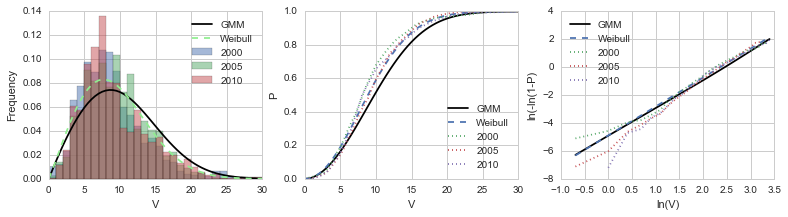

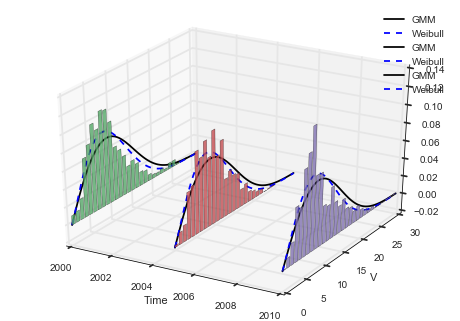

In [64]:
fig = plt.figure(figsize=(13,3))
ax1 = fig.add_subplot(1,3,1)   
ax2 = fig.add_subplot(1,3,2)   
ax3 = fig.add_subplot(1,3,3)   
fig4 = plt.figure()
ax4 = fig4.gca(projection='3d')

x = arange(0, sub_max_speed, 0.5)

# 1. GMM
direction_prob = integrate.nquad(f, [[0, inf], [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
y_gmm_ =[integrate.nquad(f, [[x_-0.01, x_+0.01], [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
          for x_ in x]
y_gmm = array(zip(*y_gmm_)[0])/direction_prob[0]/0.02
y_gmm_cdf_ =[integrate.nquad(f, [[0, x_val],
                         [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) for x_val in x]
y_gmm_cdf = array(zip(*y_gmm_cdf_)[0])/direction_prob[0]

ax1.plot(x, y_gmm,'-', color='black', label='GMM')
ax2.plot(x, y_gmm_cdf,'-', color='black', label = 'GMM')
ax3.plot(log(x), log(-log(1-y_gmm_cdf)),'-', color='black',label='GMM')

# 2. Weibull
y_weibull = sp.stats.exponweib.pdf(x, *weibull_params)
y_weibull_cdf = sp.stats.exponweib.cdf(x, *weibull_params)
ax1.plot(x, y_weibull,'--', color='lightgreen', label='Weibull')
ax2.plot(x, y_weibull_cdf,'--', label='Weibull')
ax3.plot(log(x), log(-log(1-y_weibull_cdf)), '--', label='Weibull')

# 3. Data
for start_time in xrange(20000000, 20150000, 50000):
    end_time = start_time + 50000 
    time_label = start_time//10000
    df_other_years = df_all_years.query('(date >= @start_time) & (date < @end_time)')
    df_other_years_at_angle, sub_max_speed_other_year = select_df_by_angle(df_other_years, start_angle, end_angle)
    if len(df_other_years_at_angle) > 0 :
        df_other_years_at_angle['speed'].hist(ax=ax1, figure=fig, bins=arange(0, sub_max_speed_other_year), 
                                              normed=True, alpha=0.5, label=str(time_label))
        
        ecdf = sm.distributions.ECDF(df_other_years_at_angle.speed)
        y_ecdf = ecdf(x)
        line, = ax2.plot(x, y_ecdf,':', label = time_label)
        ax3.plot(log(x), log(-log(1-y_ecdf)),':', label = time_label)
        
        count, division = np.histogram(df_other_years_at_angle['speed'], normed=True,
                                       bins=arange(0, sub_max_speed_other_year))
        ax4.bar(left=division[:-1], height=count, zs=time_label, zdir='x', 
                color=line.get_color(), alpha=0.8)
        x_3d = time_label*np.ones_like(x)
        ax4.plot(x_3d, x, y_gmm, '-', color='black', label='GMM')
        ax4.plot(x_3d, x, y_weibull, '--', color='blue', label='Weibull')
        
print '%s (%s - %s) Degree Speed Distribution' % (angle, start_angle, end_angle)
ax1.set_ylim(bottom = 0)
plt_configure(ax=ax1, xlabel='V',ylabel='Frequency',legend=True)
plt_configure(ax=ax2, xlabel='V',ylabel='P',legend={'loc':'best'})
plt_configure(ax=ax3, xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'})
plt_configure(ax=ax4, xlabel='Time',ylabel='V')
ax4.legend()

### 5.3.3 Adjacent Sector Variability

25.0
GMM, Weibull, Histogram


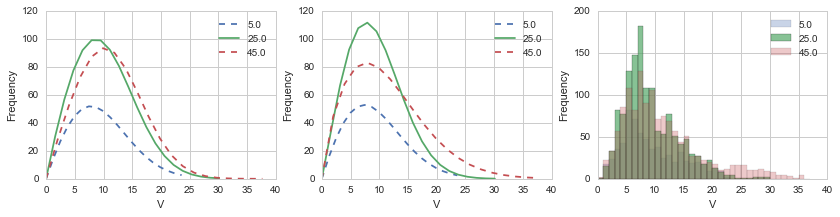

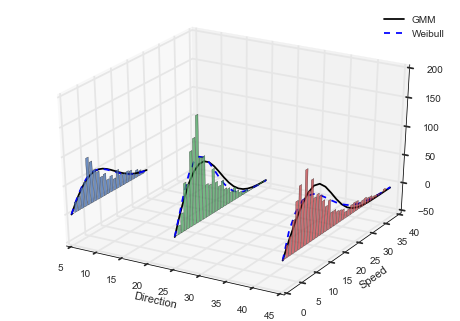

In [65]:
incre = rebinned_angle
angle_group = [max_diff_angle-incre, max_diff_angle, max_diff_angle+incre]

fig = plt.figure(figsize=(14,3))
ax1 = fig.add_subplot(1,3,1)   
ax2 = fig.add_subplot(1,3,2)   
ax3 = fig.add_subplot(1,3,3)   
fig4 = plt.figure()
ax4 = fig4.gca(projection='3d')
legend_3d = False

for curves in curve_collection:
    if curves['angle'] in angle_group:
        angle, data_size, x = curves['angle'], curves['data_size'], curves['x']
        y_gmm, y_cdf_gmm =  curves['gmm_pdf'], curves['gmm_cdf'] 
        y_weibull, y_cdf_weibull, y_cdf = curves['weibull_pdf'],  curves['weibull_cdf'], curves['ecdf']
        
        linestyle = '-' if angle == max_diff_angle else '--'
        alpha = 0.7 if angle == max_diff_angle else 0.3
        
        line, = ax1.plot(x, y_gmm*data_size, linestyle, label=angle)        
        ax2.plot(x, y_weibull*data_size, linestyle, label=angle)
        
        start_angle, end_angle = angle-incre/2, angle+incre/2
        sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)
        sub_df['speed'].hist(ax=ax3,figure=fig, bins=arange(0, sub_max_speed), alpha=alpha, label=str(angle))

#         sample = array(sub_df['speed']).reshape(-1, 1)
#         kde = neighbors.KernelDensity(bandwidth= 0.3).fit(sample) 
#         y_kde = [exp(kde.score_samples(x_val))for x_val in x]
#         ax3.plot(x, np.dot(y_kde,data_size), linestyle, label=angle, color='black')
        
        x_3d = angle*np.ones_like(x)
        ax4.plot(x_3d, x, y_gmm*data_size, color='black', label='GMM')
        ax4.plot(x_3d, x, y_weibull*data_size, color='blue', linestyle='--',label='Weibull')
        
        count, division = np.histogram(sub_df['speed'], bins=arange(0, sub_max_speed))
        ax4.bar(left=division[:-1], height=count, zs=angle, zdir='x', color=line.get_color(), alpha=0.8)
        
        if legend_3d == False:
            ax4.legend()
            legend_3d = True
        
for ax in [ax1, ax2, ax3]:
    plt_configure(ax=ax, xlabel='V',ylabel='Frequency',legend={'loc':'best'})
    
plt_configure(ax=ax4, xlabel='Direction', ylabel='Speed')   

ylim = max(ax1.get_ylim()[1],ax2.get_ylim()[1])
ax1.set_ylim(bottom = 0, top=ylim)
ax2.set_ylim(bottom = 0, top=ylim)
print max_diff_angle
print 'GMM, Weibull, Histogram'

# 6. Result Variability & Cross-Validation

In [66]:
from sklearn.cross_validation import train_test_split, KFold

if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH    
if 'FIT_METHOD' not in globals():
    FIT_METHOD = 'square_error'       
if 'KDE_KERNEL' not in globals():
    KDE_KERNEL = 'gaussian'
    
points = FITTING_RANGE
    
def fit_gmm(df, fit_method, number_of_gaussian = 3, ):
    # 1. Create Input, speed_set
    sample = sub_speed_set = array(zip(df.x, df.y))
    points = FITTING_RANGE
    
    # 2. KDE + EM fitting
    kde = neighbors.KernelDensity(bandwidth=bandwidth, kernel = KDE_KERNEL).fit(sample) 
    kde_result = exp(kde.score_samples(points))
    
    clf = mixture.GMM(n_components=number_of_gaussian, covariance_type='full')
    clf.fit(sample)
    gmm_em_result = read_gmm_em_result(clf)
        
    # 3. GMM fitting
    x0 = gmm_em_result
    bonds = [(0., 0.99),(-fit_limit, fit_limit),
             (-fit_limit, fit_limit),(0., fit_limit),(0., fit_limit),(-0.99, 0.99)]*int(len(x0)/6)
    cons = [{'type': 'eq', 'fun': lambda x: sum(x[::6]) - 1},
#             {'type': 'ineq', 'fun': lambda x: width_height_ratios_set(x) - 1/3},
#             {'type': 'ineq', 'fun': lambda x: 3 - width_height_ratios_set(x)},
           ]
 
    result = sp.optimize.minimize(
        lambda x0: GMM_fit_score(x0, kde_result, points, method=fit_method),
        x0,
        bounds = bonds,
        constraints = cons,
        tol = 0.000000000001,
        options = {"maxiter": 500})  
    
    # 4. Returns
    gmm = group_gmm_param_from_gmm_param_array(result.x)  
    mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
    gmm_pdf_result = mixed_model_pdf(points)
    
    return {
        'gmm' : gmm,
        'kde_clf': kde,
        'kde_result': kde_result,
        'gmm_pdf_result': gmm_pdf_result,
        'number_of_iteration': result.nit,
    }

## 6.1 Variability of the Result

,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.614,-4.365,-7.743,12.352,9.952,-0.364
2,0.323,-0.448,7.515,8.029,7.234,0.083
3,0.063,4.220,-8.952,10.413,5.444,-0.826


GMM Plot Result
0.613733920493 [[-4.36493677 -7.74312471]] [  8.5821319   13.33945044] -119.558792243
0.322953358603 [[-0.44779274  7.51539204]] [ 7.1175527   8.13273111] -70.8102245918
0.063312720904 [[ 4.21955756 -8.95173163]] [  2.80076356  11.41167118] -114.957970161


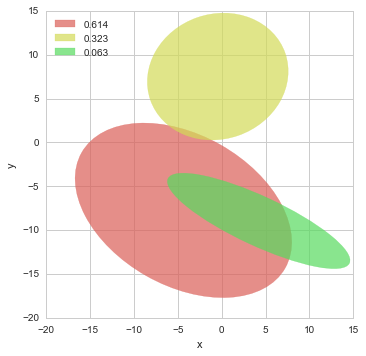

,R_square,K_S,Chi_square,MSE,RMSE / Max,RMSE / Mean
0,0.980,0.007,0.026,2.210558e-09,0.035,0.157


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.669,-6.338,-4.451,9.905,10.276,-0.210
2,0.212,1.574,8.889,6.848,6.653,-0.074
3,0.119,10.507,-12.855,6.840,6.311,-0.317


GMM Plot Result
0.669318017595 [[-6.33799067 -4.45108786]] [  8.9510108  11.116714 ] -139.954052029
0.211619790688 [[ 1.57353567  8.88864534]] [ 6.47779807  7.01422878] -124.321049752
0.119062191718 [[ 10.50677027 -12.85450013]] [ 5.40335914  7.57826171] -127.866372913


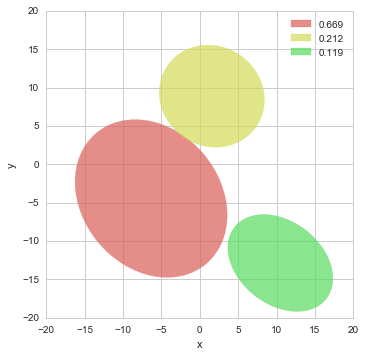

,R_square,K_S,Chi_square,MSE,RMSE / Max,RMSE / Mean
0,0.980,0.016,0.049,2.198461e-09,0.036,0.156


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.729,-5.661,-3.907,9.934,10.599,-0.186
2,0.167,2.556,9.232,6.237,6.455,-0.156
3,0.104,10.502,-12.839,6.775,5.822,-0.347


GMM Plot Result
0.729272510571 [[-5.66082411 -3.90732393]] [  9.20554375  11.23794843] -144.593106289
0.166592638124 [[ 2.55634803  9.23243274]] [ 5.81829315  6.83462403] -141.189102122
0.104134851305 [[ 10.50172256 -12.8387637 ]] [ 4.99430792  7.40640661] -123.158250358


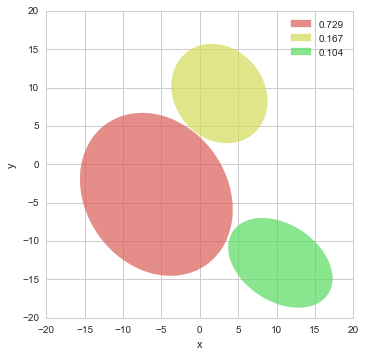

,R_square,K_S,Chi_square,MSE,RMSE / Max,RMSE / Mean
0,0.979,0.016,0.087,2.318439e-09,0.037,0.160


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.411,-8.948,-7.840,9.852,10.555,-0.477
2,0.391,-0.323,6.358,8.099,7.724,0.012
3,0.198,6.467,-10.486,9.262,6.363,-0.560


GMM Plot Result
0.410918628956 [[-8.94773571 -7.83981141]] [  7.35380404  12.42529824] -139.106757832
0.390761688992 [[-0.32343494  6.3576983 ]] [ 7.71824389  8.10486298] -83.129701536
0.198319682052 [[  6.46706278 -10.48582526]] [  4.80942152  10.15615094] -117.757760921


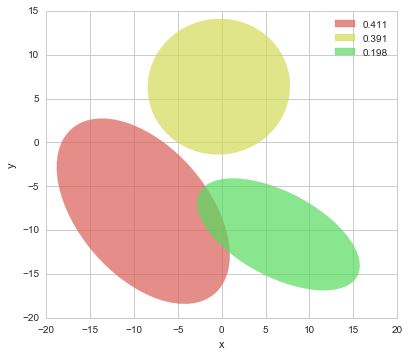

,R_square,K_S,Chi_square,MSE,RMSE / Max,RMSE / Mean
0,0.979,0.012,0.027,2.236251e-09,0.036,0.158


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.438,-0.945,5.827,8.504,8.128,0.073
2,0.360,-9.010,-8.659,10.167,10.508,-0.525
3,0.201,6.404,-10.461,9.333,6.189,-0.543


GMM Plot Result
0.438224754407 [[-0.94458875  5.82654524]] [ 7.95225824  8.66859999] -60.8311159879
0.360432701334 [[-9.01022651 -8.65938239]] [  7.12137848  12.77002198] -136.799372672
0.201342544259 [[  6.40402414 -10.46074078]] [  4.7909878   10.12178004] -116.068062436


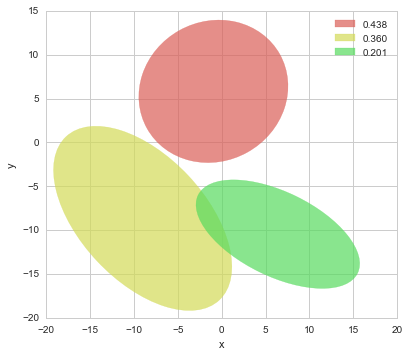

,R_square,K_S,Chi_square,MSE,RMSE / Max,RMSE / Mean
0,0.981,0.009,0.023,2.054990e-09,0.035,0.151


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.397,-9.461,-7.238,9.505,10.498,-0.437
2,0.369,0.033,6.987,8.046,7.482,-0.013
3,0.234,5.710,-10.063,9.628,6.934,-0.562


GMM Plot Result
0.396996915519 [[-9.4614018  -7.23826718]] [  7.4510362   12.04290248] -141.409609248
0.368980066494 [[ 0.03339985  6.98735636]] [ 7.47768532  8.04972141] -94.9343109441
0.234023017987 [[  5.71006499 -10.0630051 ]] [  5.16944443  10.67942157] -119.635834444


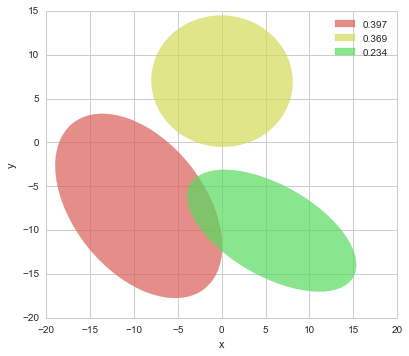

,R_square,K_S,Chi_square,MSE,RMSE / Max,RMSE / Mean
0,0.979,0.012,0.028,2.307162e-09,0.037,0.160


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.639,-4.119,-7.606,12.271,9.886,-0.351
2,0.303,-0.510,7.747,7.922,7.066,0.075
3,0.058,4.867,-9.092,10.766,5.082,-0.817


GMM Plot Result
0.638716145273 [[-4.11862513 -7.60596295]] [  8.60642955  13.20020336] -119.083662113
0.303417728818 [[-0.50997975  7.74721276]] [ 6.976872    8.00119253] -73.3928406141
0.0578661259088 [[ 4.8668119  -9.09200485]] [  2.72229985  11.58975072] -112.394461739


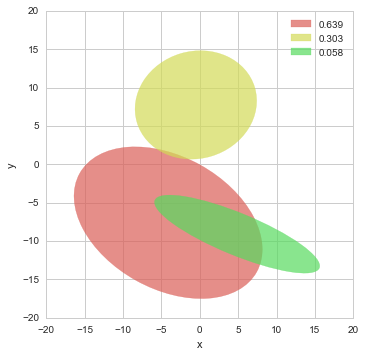

,R_square,K_S,Chi_square,MSE,RMSE / Max,RMSE / Mean
0,0.980,0.008,0.031,2.204453e-09,0.036,0.157


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.704,-5.852,-4.546,10.273,10.491,-0.238
2,0.197,1.961,8.938,6.586,6.896,-0.102
3,0.099,10.711,-13.281,6.834,6.168,-0.403


GMM Plot Result
0.704292743892 [[-5.85214781 -4.54565009]] [  9.05769206  11.55679429] -137.513754614
0.196563255103 [[ 1.96092077  8.93785289]] [ 6.35482407  7.11012286] -147.124204866
0.0991440010049 [[ 10.71142773 -13.28054752]] [ 4.98523689  7.73972613] -127.847414689


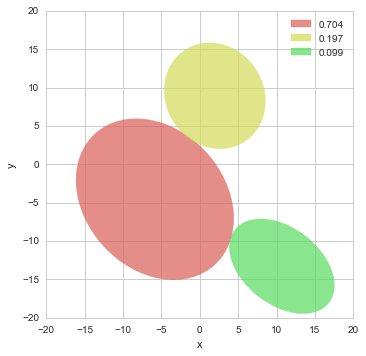

,R_square,K_S,Chi_square,MSE,RMSE / Max,RMSE / Mean
0,0.980,0.014,0.060,2.159052e-09,0.038,0.155


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.697,-2.712,-7.531,12.267,9.256,-0.354
2,0.272,-1.889,8.880,7.912,7.628,0.368
3,0.031,5.677,4.170,2.833,3.321,-0.270


GMM Plot Result
0.697135228814 [[-2.711713   -7.53131318]] [  8.14980375  13.02845385] -115.572890537
0.272206901325 [[-1.88903091  8.87983326]] [ 6.17011376  9.09484815] -47.8406258957
0.0306578698616 [[ 5.67687275  4.16964443]] [ 2.56459016  3.53220356] -150.273171075


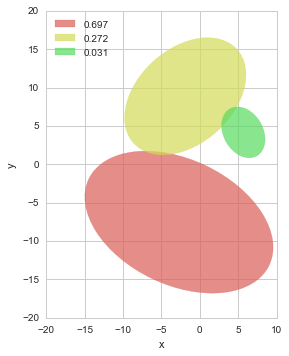

,R_square,K_S,Chi_square,MSE,RMSE / Max,RMSE / Mean
0,0.983,0.008,0.029,1.847421e-09,0.033,0.143


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.529,-5.668,3.242,9.945,10.153,0.377
2,0.430,2.108,-10.689,10.666,8.154,-0.260
3,0.041,4.444,6.097,3.285,5.231,-0.527


GMM Plot Result
0.529152558517 [[-5.66810341  3.24155382]] [  7.92865808  11.79498583] 136.577584265
0.429921763029 [[  2.1082812  -10.68948744]] [  7.57645202  11.08351822] -111.87870605
0.0409256784541 [[ 4.4442742   6.09664728]] [ 2.60794796  5.59925998] -156.224467545


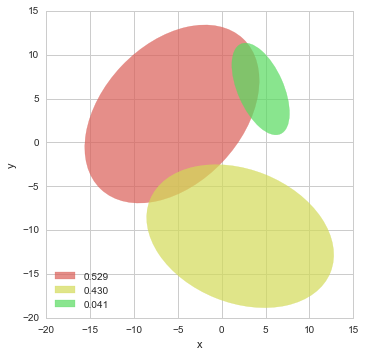

,R_square,K_S,Chi_square,MSE,RMSE / Max,RMSE / Mean
0,0.983,0.007,0.024,1.847712e-09,0.033,0.143


In [67]:
for i in range(10):
    df_resampled = df.sample(frac=1, replace=True)
    result = fit_gmm(df_resampled, number_of_gaussian=NUMBER_OF_GAUSSIAN, fit_method=FIT_METHOD)
    display(pretty_print_gmm(result['gmm']))
    plot_gmm_ellipses(result['gmm'])
    display(gof_df(result['gmm_pdf_result'], result['kde_result']))

## 6.2 Cross-validation, to select the number of Gaussian

In [68]:
## 5-fold cross validation
gaussian_number_range = arange(1,7)
CV_result_train_all,CV_result_test_all =[],[]
number_of_fold = 4
print 'Number of train/test dataset', len(df)*(number_of_fold-1)/number_of_fold, len(df)/number_of_fold

for number_of_gaussian in gaussian_number_range:
    print '  '
    print 'Number of gaussian', number_of_gaussian
    
    kf = KFold(len(df), n_folds=number_of_fold, shuffle=True) 

    CV_result_train, CV_result_test = [],[]
    for train_index, test_index in kf:
        sub_df, sub_df_test = df.iloc[train_index], df.iloc[test_index]

        # 1. Train
        result = fit_gmm(sub_df, fit_method = FIT_METHOD, number_of_gaussian=number_of_gaussian)
        gmm_pdf_result_train = result['gmm_pdf_result']
        kde_result_train = result['kde_result']

        # 2. Validate
        # GMM from Train - KDE from Test
        sample = array(zip(sub_df_test.x, sub_df_test.y))
        kde_test = neighbors.KernelDensity(bandwidth=bandwidth).fit(sample) 
        kde_result_test = exp(kde_test.score_samples(points))

        gof_train = goodness_of_fit_summary(gmm_pdf_result_train, 
                                            kde_result_train,)
        gof_test =  goodness_of_fit_summary(gmm_pdf_result_train, 
                                            kde_result_test,)
                
        CV_result_train.append(gof_train)
        CV_result_test.append(gof_test)
        
    CV_result_train_all.append(CV_result_train)
    CV_result_test_all.append(CV_result_test)
    
    print 'Train'
    pretty_pd_display(CV_result_train)
    print 'Test'
    pretty_pd_display(CV_result_test)

Number of train/test dataset 32142.75 10714.25
  
Number of gaussian 1
Train


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.075741,0.021701,8.318105e-09,0.071564,0.303921,0.922690
1,0.078549,0.021659,8.526730e-09,0.071019,0.307835,0.921639
2,0.076986,0.020063,8.102335e-09,0.068877,0.299825,0.925494
3,0.076587,0.021574,8.554950e-09,0.071638,0.308320,0.921442


Test


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.086565,0.021352,8.881101e-09,0.070110,0.314136,0.920568
1,0.076012,0.022343,8.347808e-09,0.069015,0.304185,0.922684
2,0.084628,0.028467,9.931253e-09,0.079978,0.332618,0.908309
3,0.081829,0.022809,8.079289e-09,0.068480,0.299321,0.924933


  
Number of gaussian 2
Train


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.032297,0.010280,2.622086e-09,0.039235,0.170618,0.975927
1,0.033065,0.011326,2.952924e-09,0.043155,0.181114,0.972755
2,0.034451,0.010983,2.700292e-09,0.039969,0.173160,0.975214
3,0.031387,0.011485,2.831131e-09,0.040683,0.177354,0.973743


Test


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.040582,0.013291,3.748812e-09,0.047943,0.204162,0.965204
1,0.038159,0.015167,2.882074e-09,0.038531,0.178857,0.973668
2,0.043617,0.017001,3.513029e-09,0.045491,0.197581,0.967364
3,0.035126,0.013620,3.157992e-09,0.044173,0.187176,0.971566


  
Number of gaussian 3
Train


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.020968,0.006978,2.086212e-09,0.034594,0.152253,0.980717
1,0.046138,0.014358,2.088614e-09,0.035636,0.152245,0.980778
2,0.026963,0.007637,2.011947e-09,0.034351,0.149454,0.981564
3,0.064648,0.015921,2.180969e-09,0.036465,0.155688,0.979817


Test


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.026478,0.010435,2.920370e-09,0.042277,0.179967,0.973411
1,0.053691,0.016527,2.535521e-09,0.037491,0.168004,0.976598
2,0.031950,0.010725,3.067024e-09,0.040622,0.184667,0.971375
3,0.172285,0.017962,2.396803e-09,0.036581,0.162988,0.978257


  
Number of gaussian 4
Train


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.015333,0.005948,1.067546e-09,0.025863,0.108842,0.990198
1,0.018869,0.007700,1.068103e-09,0.024985,0.108906,0.990154
2,0.015563,0.007462,1.060369e-09,0.024917,0.108541,0.990249
3,0.017657,0.008452,1.117974e-09,0.025718,0.111463,0.989637


Test


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.027162,0.013518,1.841726e-09,0.030875,0.143195,0.982910
1,0.023966,0.011585,1.615875e-09,0.029689,0.133998,0.985164
2,0.021006,0.011872,1.565018e-09,0.031286,0.131762,0.985509
3,0.021199,0.007726,1.509024e-09,0.030111,0.129341,0.986373


  
Number of gaussian 5
Train


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.013500,0.008869,7.986226e-10,0.021711,0.094164,0.992606
1,0.014343,0.007739,8.250885e-10,0.021843,0.095720,0.992411
2,0.012058,0.009983,7.706698e-10,0.021751,0.092546,0.992877
3,0.014158,0.008350,7.300865e-10,0.021015,0.090038,0.993310


Test


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.018474,0.011710,1.118998e-09,0.025442,0.111533,0.989853
1,0.022041,0.009845,1.409153e-09,0.029925,0.125127,0.987002
2,0.015824,0.011369,1.304182e-09,0.026862,0.120233,0.988122
3,0.020193,0.009764,1.552342e-09,0.029629,0.131343,0.985509


  
Number of gaussian 6
Train


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.036320,0.004806,5.707986e-10,0.018536,0.079659,0.994717
1,0.012758,0.004253,6.708919e-10,0.020175,0.086349,0.993829
2,0.011794,0.004733,5.645636e-10,0.018302,0.079203,0.994753
3,0.032235,0.005218,4.996218e-10,0.017173,0.074412,0.995446


Test


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.027471,0.012073,9.353789e-10,0.023441,0.101777,0.991513
1,0.021301,0.013606,1.036979e-09,0.024311,0.107208,0.990424
2,0.020632,0.016083,1.795910e-09,0.032878,0.141129,0.983963
3,0.042816,0.011783,1.284307e-09,0.027730,0.119811,0.987804


In [69]:
train_scores_mean, train_scores_std = generate_mean_std_gof(CV_result_train_all)
print 'Train gof mean, std'
display(train_scores_mean)

test_scores_mean, test_scores_std = generate_mean_std_gof(CV_result_test_all)
print 'Test gof mean, std'
display(test_scores_mean)

Train gof mean, std


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.076966,0.021249,8.375530e-09,0.070775,0.304975,0.922816
1,0.032800,0.011018,2.776608e-09,0.040761,0.175561,0.974410
2,0.039679,0.011224,2.091936e-09,0.035262,0.152410,0.980719
3,0.016856,0.007390,1.078498e-09,0.025371,0.109438,0.990060
4,0.013515,0.008735,7.811168e-10,0.021580,0.093117,0.992801
5,0.023277,0.004752,5.764690e-10,0.018546,0.079906,0.994686


Test gof mean, std


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.082258,0.023743,8.809863e-09,0.071896,0.312565,0.919123
1,0.039371,0.014770,3.325477e-09,0.044035,0.191944,0.969450
2,0.071101,0.013912,2.729930e-09,0.039243,0.173907,0.974910
3,0.023333,0.011175,1.632911e-09,0.030490,0.134574,0.984989
4,0.019133,0.010672,1.346169e-09,0.027965,0.122059,0.987621
5,0.028055,0.013386,1.263144e-09,0.027090,0.117481,0.988426


R_square


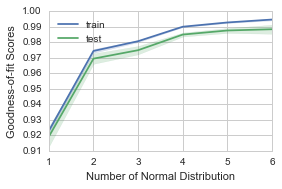

K_S


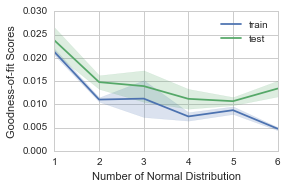

Chi_square


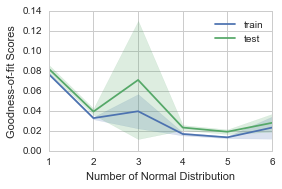

In [70]:
prop_cycle=mpl.rcParams['axes.color_cycle']
for column in ['R_square','K_S','Chi_square', ]:
    plot(gaussian_number_range, train_scores_mean[column],
             '-', label = 'train', color=prop_cycle[0])
    plt.fill_between(gaussian_number_range, 
                     train_scores_mean[column] - train_scores_std[column],
                     train_scores_mean[column] + train_scores_std[column], 
                     alpha=0.2, color=prop_cycle[0])
    
    plot(gaussian_number_range, test_scores_mean[column],
             '-', label = 'test',color=prop_cycle[1])
    plt.fill_between(gaussian_number_range, 
                 test_scores_mean[column] - test_scores_std[column],
                 test_scores_mean[column] + test_scores_std[column], 
                 alpha=0.2,color=prop_cycle[1])
    plt.xticks(gaussian_number_range)
    print column
    plt_configure(xlabel='Number of Normal Distribution', ylabel='Goodness-of-fit Scores', 
                  figsize=(4,2.5), legend={'loc':'best'})
    plt.show()

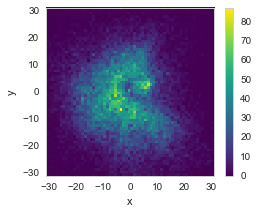

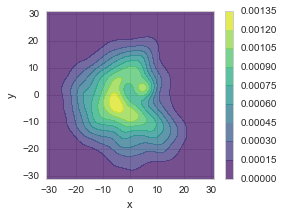

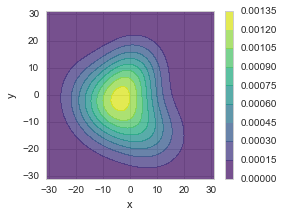

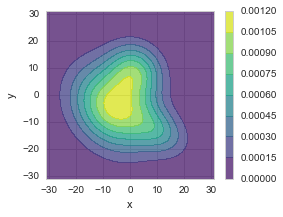

In [71]:
for fig in [fig_hist, fig_kde, fig_em, fig_gmm]:
    display(fig)

In [72]:
import time
save_notebook()
time.sleep(3)
location_name = get_location_name(ipath)
current_file = 'GMM.ipynb'
output_file = './output_HTML/'+location_name+'.html' 
output_HTML(current_file, output_file)